In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

# 让图片内嵌在网页中
%matplotlib inline
# 指定画布风格
plt.style.use("fivethirtyeight")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 检查Python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3 来完成此项目')

In [2]:
df = pd.read_csv("lianjia.csv")
# anjuke_df['District'] = anjuke_df['Region'].str.extract(r'.+?-(.+?)-.+?', expand=False)
# houseCode无意义可去除，重新摆放列位置
columns = ['houseCode','houseName','houseDirection','houseType','houseElevator','houseRegion','houseDistrict','houseAddress','houseFloor','houseSize','houseStatus','houseUnitPrice','houseAllPrice','houseYear','Latitude','Longitude']
data = pd.DataFrame(df, columns = columns)

In [3]:
# 检查缺失值情况
data.info()
# 删除价格缺失的行
misn = len(data.loc[(data['houseAllPrice'].isnull()), 'houseAllPrice'])
print('1、houseAllPrice缺失值数量为：'+ str(misn))
# data.loc[(data['houseAllPrice'].isnull()), 'houseAllPrice']
data = data[pd.notnull(data['houseAllPrice'])]
misn = len(data.loc[(data['houseAllPrice'].isnull()), 'houseAllPrice'])
print('2、houseAllPrice缺失值数量为：'+ str(misn))
# display(data.head())
# 总价前五的房子
data.sort_values('houseAllPrice',ascending=False).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35231 entries, 0 to 35230
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   houseCode       35231 non-null  float64
 1   houseName       35231 non-null  object 
 2   houseDirection  35231 non-null  object 
 3   houseType       35225 non-null  object 
 4   houseElevator   34801 non-null  object 
 5   houseRegion     35231 non-null  object 
 6   houseDistrict   35231 non-null  object 
 7   houseAddress    15524 non-null  object 
 8   houseFloor      35231 non-null  object 
 9   houseSize       35231 non-null  float64
 10  houseStatus     35225 non-null  object 
 11  houseUnitPrice  35231 non-null  int64  
 12  houseAllPrice   35181 non-null  float64
 13  houseYear       33827 non-null  float64
 14  Latitude        35135 non-null  float64
 15  Longitude       35135 non-null  float64
dtypes: float64(6), int64(1), object(9)
memory usage: 4.3+ MB
1、houseAllPrice缺失值数

,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude
8513,1.030000e+11,武林壹号,南,5室2厅1厨4卫,有,拱墅,湖墅,NaN,高楼层 (共21层),640.59,精装,112397,7200.0,2015.0,30.283487,120.164747
8025,1.030000e+11,绿城江南里,南,6室2厅1厨4卫,暂无数据,拱墅,桥西,近地铁5号线大运河站,低楼层 (共2层),385.57,毛坯,176363,6800.0,NaN,30.326541,120.144410
11164,1.030000e+11,钱塘航空大厦,南,9室0厅0厨0卫,有,江干,钱江新城,近地铁4号线城星路站,低楼层 (共37层),1396.51,精装,44998,6284.0,2012.0,30.243317,120.215114
8568,1.030000e+11,武林壹号,南,5室2厅2厨6卫,有,拱墅,湖墅,NaN,高楼层 (共21层),556.79,精装,110042,6127.0,2015.0,30.283487,120.164747
8631,1.030000e+11,武林壹号,南,6室2厅2厨6卫,有,拱墅,湖墅,NaN,高楼层 (共21层),561.24,精装,103343,5800.0,2015.0,30.283487,120.164747


,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude
8513,1.030000e+11,武林壹号,南,5室2厅1厨4卫,有,拱墅,湖墅,NaN,高楼层 (共21层),640.59,精装,112397,7200.0,2015.0,30.283487,120.164747
8025,1.030000e+11,绿城江南里,南,6室2厅1厨4卫,暂无数据,拱墅,桥西,近地铁5号线大运河站,低楼层 (共2层),385.57,毛坯,176363,6800.0,NaN,30.326541,120.144410
11164,1.030000e+11,钱塘航空大厦,南,9室0厅0厨0卫,有,江干,钱江新城,近地铁4号线城星路站,低楼层 (共37层),1396.51,精装,44998,6284.0,2012.0,30.243317,120.215114
8568,1.030000e+11,武林壹号,南,5室2厅2厨6卫,有,拱墅,湖墅,NaN,高楼层 (共21层),556.79,精装,110042,6127.0,2015.0,30.283487,120.164747
8631,1.030000e+11,武林壹号,南,6室2厅2厨6卫,有,拱墅,湖墅,NaN,高楼层 (共21层),561.24,精装,103343,5800.0,2015.0,30.283487,120.164747


可以发现总共有35231条数据，其中houseAddress字段有明显缺失 

In [4]:
# 特征值是数值的一些统计值，包括平均数，标准差，中位数，最小值，最大值，25%分位数，75%分位数。
data.describe()

,houseCode,houseSize,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude
count,3.518100e+04,35181.000000,35181.000000,35181.000000,33780.000000,35085.000000,35085.000000
mean,1.030000e+11,94.560622,38832.079361,377.618004,2006.546004,30.291515,120.179453
std,0.000000e+00,49.943962,13406.724005,288.103624,8.637633,0.052766,0.087969
min,1.030000e+11,14.530000,4832.000000,26.000000,1969.000000,30.132153,119.702264
25%,1.030000e+11,59.480000,29588.000000,215.000000,2000.000000,30.265692,120.120137
50%,1.030000e+11,87.640000,37621.000000,310.000000,2009.000000,30.296537,120.175401
75%,1.030000e+11,118.380000,45593.000000,452.000000,2014.000000,30.325068,120.215114
max,1.030000e+11,1396.510000,176363.000000,7200.000000,2020.000000,30.483322,120.606025


,houseCode,houseSize,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude
count,3.518100e+04,35181.000000,35181.000000,35181.000000,33780.000000,35085.000000,35085.000000
mean,1.030000e+11,94.560622,38832.079361,377.618004,2006.546004,30.291515,120.179453
std,0.000000e+00,49.943962,13406.724005,288.103624,8.637633,0.052766,0.087969
min,1.030000e+11,14.530000,4832.000000,26.000000,1969.000000,30.132153,119.702264
25%,1.030000e+11,59.480000,29588.000000,215.000000,2000.000000,30.265692,120.120137
50%,1.030000e+11,87.640000,37621.000000,310.000000,2009.000000,30.296537,120.175401
75%,1.030000e+11,118.380000,45593.000000,452.000000,2014.000000,30.325068,120.215114
max,1.030000e+11,1396.510000,176363.000000,7200.000000,2020.000000,30.483322,120.606025


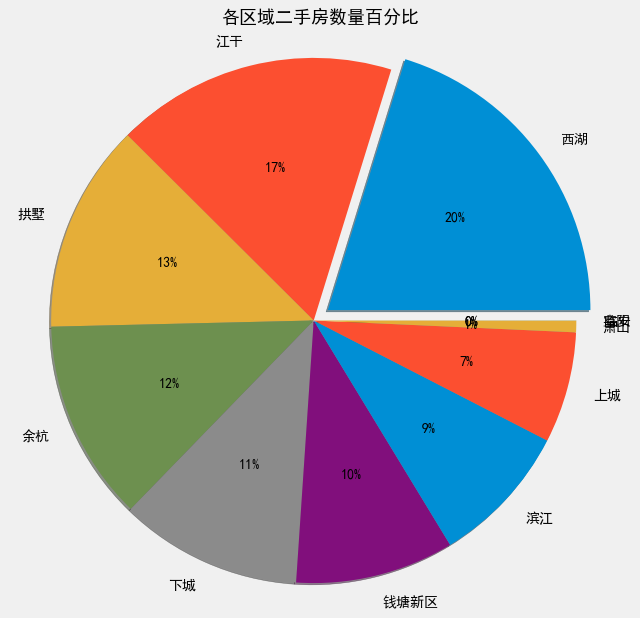

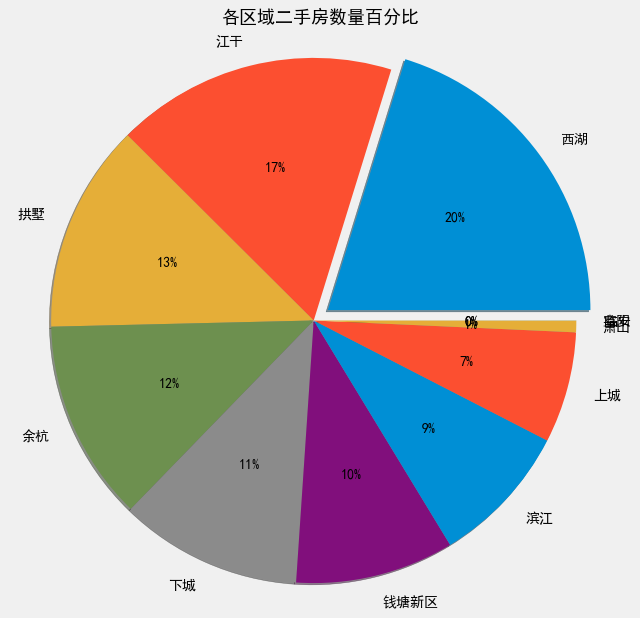

In [5]:
# 按区域分析数量
df_house_count = data.groupby('houseRegion')['houseCode'].count().sort_values(ascending=False)
df_house_count.columns = ['Region', 'Count']

plt.figure(figsize=(10,10))
plt.title(u'各区域二手房数量百分比', fontsize=18)
explode=[0]*len(df_house_count)
explode[0] = 0.2
plt.pie(df_house_count, radius=3, autopct='%1.f%%', shadow=True, labels=df_house_count.index, explode=explode)
plt.axis('equal')

plt.show()

In [6]:
# 按区域分析数量和价格
df_house_mean = data.groupby('houseRegion')['houseUnitPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
df_house_mean

,houseRegion,houseUnitPrice
0,上城,49418.792931
1,西湖,45720.738092
2,滨江,41307.678038
3,下城,40462.313103
4,拱墅,39611.606289
5,江干,37798.113793
6,萧山,32274.012048
7,余杭,30067.256670
8,钱塘新区,25470.772635
9,富阳,21652.000000


,houseRegion,houseUnitPrice
0,上城,49418.792931
1,西湖,45720.738092
2,滨江,41307.678038
3,下城,40462.313103
4,拱墅,39611.606289
5,江干,37798.113793
6,萧山,32274.012048
7,余杭,30067.256670
8,钱塘新区,25470.772635
9,富阳,21652.000000


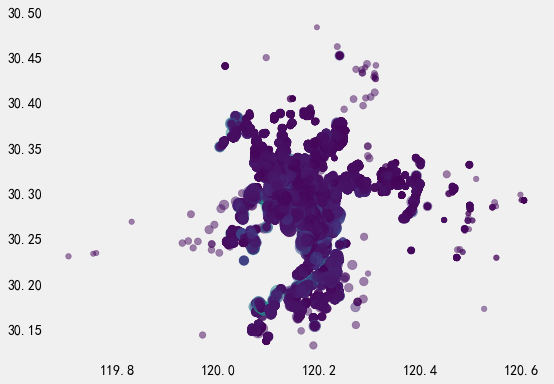

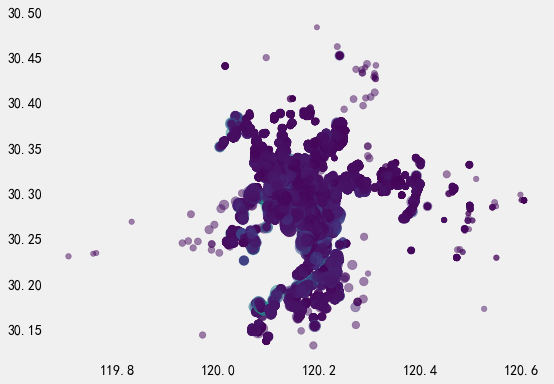

In [7]:
# s-size点大小 c-color点颜色
plt.figure(figsize=(8,6))
plt.scatter(data['Longitude'],data['Latitude'],s=data['houseUnitPrice']/500, c= data['houseAllPrice'],alpha=0.5)

plt.grid()

In [8]:
# 极差分析
def d_range(df,*cols):
    krange = list()
    for col in cols:
        crange = df[col].max()-df[col].min()
        krange.append(crange)
    return krange

key1 = "houseUnitPrice"
dr = d_range(data,key1)
print(f"极差是{dr}")
# 发现价差相差17万，发现一个是地下室，另一个是2层别墅
data[data["houseUnitPrice"] == data[key1].min()]
data[data["houseUnitPrice"] == data[key1].max()]

极差是[171531]
极差是[171531]


,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude
8025,1.030000e+11,绿城江南里,南,6室2厅1厨4卫,暂无数据,拱墅,桥西,近地铁5号线大运河站,低楼层 (共2层),385.57,毛坯,176363,6800.0,NaN,30.326541,120.14441


,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude
8025,1.030000e+11,绿城江南里,南,6室2厅1厨4卫,暂无数据,拱墅,桥西,近地铁5号线大运河站,低楼层 (共2层),385.57,毛坯,176363,6800.0,NaN,30.326541,120.14441


,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude,houseAllPriceRange
0,1.030000e+11,翠苑三区,南,2室1厅1厨1卫,无,西湖,翠苑,近地铁2号线古翠路站,中楼层 (共6层),50.38,简装,43272,218.0,1989.0,30.295132,120.128569,"[169.48, 312.96)"
1,1.030000e+11,翠苑一区,东,3室1厅1厨1卫,无,西湖,翠苑,近地铁2号线学院路站,高楼层 (共7层),60.28,精装,41308,249.0,1988.0,30.292449,120.134098,"[169.48, 312.96)"
2,1.030000e+11,翠苑三区,南 北,1室1厅1厨1卫,无,西湖,翠苑,近地铁2号线古翠路站,中楼层 (共6层),41.09,简装,40886,168.0,1989.0,30.295132,120.128569,"[26.0, 169.48)"
3,1.030000e+11,翠苑逸景湾,南,2室2厅1厨1卫,有,西湖,翠苑,NaN,中楼层 (共27层),87.59,简装,41101,360.0,2013.0,30.299356,120.128079,"[312.96, 456.44)"
4,1.030000e+11,学苑春晓,南 北,2室2厅1厨1卫,无,西湖,翠苑,NaN,低楼层 (共6层),98.00,精装,44898,440.0,2003.0,30.299762,120.134961,"[312.96, 456.44)"
5,1.030000e+11,翠苑二区,南,2室0厅1厨1卫,无,西湖,翠苑,近地铁2号线学院路站,高楼层 (共7层),44.68,简装,42525,190.0,1989.0,30.296620,120.134062,"[169.48, 312.96)"
6,1.030000e+11,天苑花园,南,2室2厅1厨1卫,有,西湖,翠苑,近地铁2号线古翠路站,低楼层 (共18层),73.97,简装,37854,280.0,1998.0,30.283647,120.129157,"[169.48, 312.96)"
7,1.030000e+11,翠苑四区,南,2室1厅1厨1卫,无,西湖,翠苑,近2号线古翠路站,高楼层 (共7层),51.89,简装,41434,215.0,1993.0,30.293387,120.127871,"[169.48, 312.96)"
8,1.030000e+11,翠苑五区,南,2室1厅1厨1卫,无,西湖,翠苑,近地铁2号线古翠路站,高楼层 (共7层),71.27,简装,39007,278.0,1996.0,30.289521,120.127729,"[169.48, 312.96)"
9,1.030000e+11,翠苑四区,南,2室1厅1厨1卫,无,西湖,翠苑,近2号线古翠路站,低楼层 (共7层),48.86,简装,41957,205.0,1993.0,30.293387,120.127871,"[169.48, 312.96)"


,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude,houseAllPriceRange
0,1.030000e+11,翠苑三区,南,2室1厅1厨1卫,无,西湖,翠苑,近地铁2号线古翠路站,中楼层 (共6层),50.38,简装,43272,218.0,1989.0,30.295132,120.128569,"[169.48, 312.96)"
1,1.030000e+11,翠苑一区,东,3室1厅1厨1卫,无,西湖,翠苑,近地铁2号线学院路站,高楼层 (共7层),60.28,精装,41308,249.0,1988.0,30.292449,120.134098,"[169.48, 312.96)"
2,1.030000e+11,翠苑三区,南 北,1室1厅1厨1卫,无,西湖,翠苑,近地铁2号线古翠路站,中楼层 (共6层),41.09,简装,40886,168.0,1989.0,30.295132,120.128569,"[26.0, 169.48)"
3,1.030000e+11,翠苑逸景湾,南,2室2厅1厨1卫,有,西湖,翠苑,NaN,中楼层 (共27层),87.59,简装,41101,360.0,2013.0,30.299356,120.128079,"[312.96, 456.44)"
4,1.030000e+11,学苑春晓,南 北,2室2厅1厨1卫,无,西湖,翠苑,NaN,低楼层 (共6层),98.00,精装,44898,440.0,2003.0,30.299762,120.134961,"[312.96, 456.44)"
5,1.030000e+11,翠苑二区,南,2室0厅1厨1卫,无,西湖,翠苑,近地铁2号线学院路站,高楼层 (共7层),44.68,简装,42525,190.0,1989.0,30.296620,120.134062,"[169.48, 312.96)"
6,1.030000e+11,天苑花园,南,2室2厅1厨1卫,有,西湖,翠苑,近地铁2号线古翠路站,低楼层 (共18层),73.97,简装,37854,280.0,1998.0,30.283647,120.129157,"[169.48, 312.96)"
7,1.030000e+11,翠苑四区,南,2室1厅1厨1卫,无,西湖,翠苑,近2号线古翠路站,高楼层 (共7层),51.89,简装,41434,215.0,1993.0,30.293387,120.127871,"[169.48, 312.96)"
8,1.030000e+11,翠苑五区,南,2室1厅1厨1卫,无,西湖,翠苑,近地铁2号线古翠路站,高楼层 (共7层),71.27,简装,39007,278.0,1996.0,30.289521,120.127729,"[169.48, 312.96)"
9,1.030000e+11,翠苑四区,南,2室1厅1厨1卫,无,西湖,翠苑,近2号线古翠路站,低楼层 (共7层),48.86,简装,41957,205.0,1993.0,30.293387,120.127871,"[169.48, 312.96)"


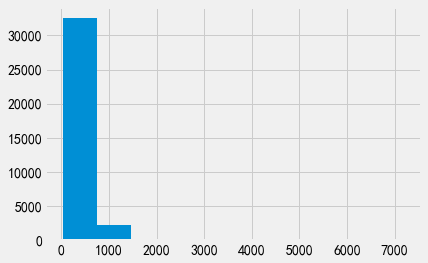

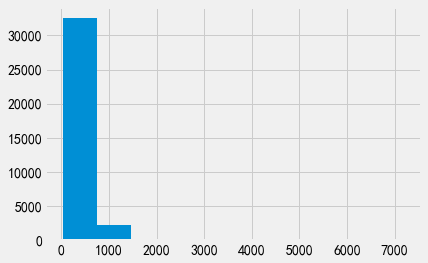

In [9]:
# 频率分布情况
data['houseAllPrice'].hist(bins = 10)

gcut = pd.cut(data["houseAllPrice"], 50, right=False)
gcut_count = gcut.value_counts(sort = False)
data['houseAllPriceRange'] = gcut.values
data.head(10)

In [10]:
# 区间出现频率
r_zj =  pd.DataFrame(gcut_count)
r_zj.rename(columns = {gcut_count.name:'频数'},inplace=True)
r_zj['频率'] = r_zj['频数'] / r_zj['频数'].sum()
r_zj['累计频率'] = r_zj['频率'].cumsum()
r_zj['频率%'] = r_zj['频率'].apply(lambda x:"%.2f%%"%(x*100))
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x:"%.2f%%"%(x*100))
r_zj.style.bar(subset=['频率','累计频率'])

,频数,频率,累计频率,频率%,累计频率%
"[26.0, 169.48)",5427,0.154259,0.154259,15.43%,15.43%
"[169.48, 312.96)",12511,0.355618,0.509877,35.56%,50.99%
"[312.96, 456.44)",8506,0.241778,0.751656,24.18%,75.17%
"[456.44, 599.92)",3926,0.111594,0.863250,11.16%,86.33%
"[599.92, 743.4)",2168,0.061624,0.924874,6.16%,92.49%
"[743.4, 886.88)",1102,0.031324,0.956198,3.13%,95.62%
"[886.88, 1030.36)",580,0.016486,0.972684,1.65%,97.27%
"[1030.36, 1173.84)",218,0.006197,0.978881,0.62%,97.89%
"[1173.84, 1317.32)",242,0.006879,0.985759,0.69%,98.58%
"[1317.32, 1460.8)",154,0.004377,0.990137,0.44%,99.01%


,频数,频率,累计频率,频率%,累计频率%
"[26.0, 169.48)",5427,0.154259,0.154259,15.43%,15.43%
"[169.48, 312.96)",12511,0.355618,0.509877,35.56%,50.99%
"[312.96, 456.44)",8506,0.241778,0.751656,24.18%,75.17%
"[456.44, 599.92)",3926,0.111594,0.863250,11.16%,86.33%
"[599.92, 743.4)",2168,0.061624,0.924874,6.16%,92.49%
"[743.4, 886.88)",1102,0.031324,0.956198,3.13%,95.62%
"[886.88, 1030.36)",580,0.016486,0.972684,1.65%,97.27%
"[1030.36, 1173.84)",218,0.006197,0.978881,0.62%,97.89%
"[1173.84, 1317.32)",242,0.006879,0.985759,0.69%,98.58%
"[1317.32, 1460.8)",154,0.004377,0.990137,0.44%,99.01%


In [11]:
# 朝向 频率分布 定性字段 # 可视化显示
cx_g = data['houseDirection'].value_counts(sort = True)
r_cx =  pd.DataFrame(cx_g)

r_cx.rename(columns = {cx_g.name:'频数'},inplace=True)
r_cx['频率'] = r_cx['频数'] / r_cx['频数'].sum()
r_cx['累计频率'] = r_cx['频率'].cumsum()
r_cx['频率%'] = r_cx['频率'].apply(lambda x:"%.2f%%"%(x*100))
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x:"%.2f%%"%(x*100))
r_cx.style.bar(subset=['频率','累计频率'])

,频数,频率,累计频率,频率%,累计频率%
南,22573,0.641625,0.641625,64.16%,64.16%
南 北,6507,0.184958,0.826583,18.50%,82.66%
北,1216,0.034564,0.861147,3.46%,86.11%
东南,906,0.025753,0.886899,2.58%,88.69%
东,836,0.023763,0.910662,2.38%,91.07%
西,648,0.018419,0.929081,1.84%,92.91%
西南,435,0.012365,0.941446,1.24%,94.14%
东 南 北,255,0.007248,0.948694,0.72%,94.87%
东 西,215,0.006111,0.954805,0.61%,95.48%
南 西 北,194,0.005514,0.960319,0.55%,96.03%


,频数,频率,累计频率,频率%,累计频率%
南,22573,0.641625,0.641625,64.16%,64.16%
南 北,6507,0.184958,0.826583,18.50%,82.66%
北,1216,0.034564,0.861147,3.46%,86.11%
东南,906,0.025753,0.886899,2.58%,88.69%
东,836,0.023763,0.910662,2.38%,91.07%
西,648,0.018419,0.929081,1.84%,92.91%
西南,435,0.012365,0.941446,1.24%,94.14%
东 南 北,255,0.007248,0.948694,0.72%,94.87%
东 西,215,0.006111,0.954805,0.61%,95.48%
南 西 北,194,0.005514,0.960319,0.55%,96.03%


(-1.1135720634779478,
 1.1006462887380317,
 -1.1155983447319608,
 1.1093514794454058)

(-1.1135720634779478,
 1.1006462887380317,
 -1.1155983447319608,
 1.1093514794454058)

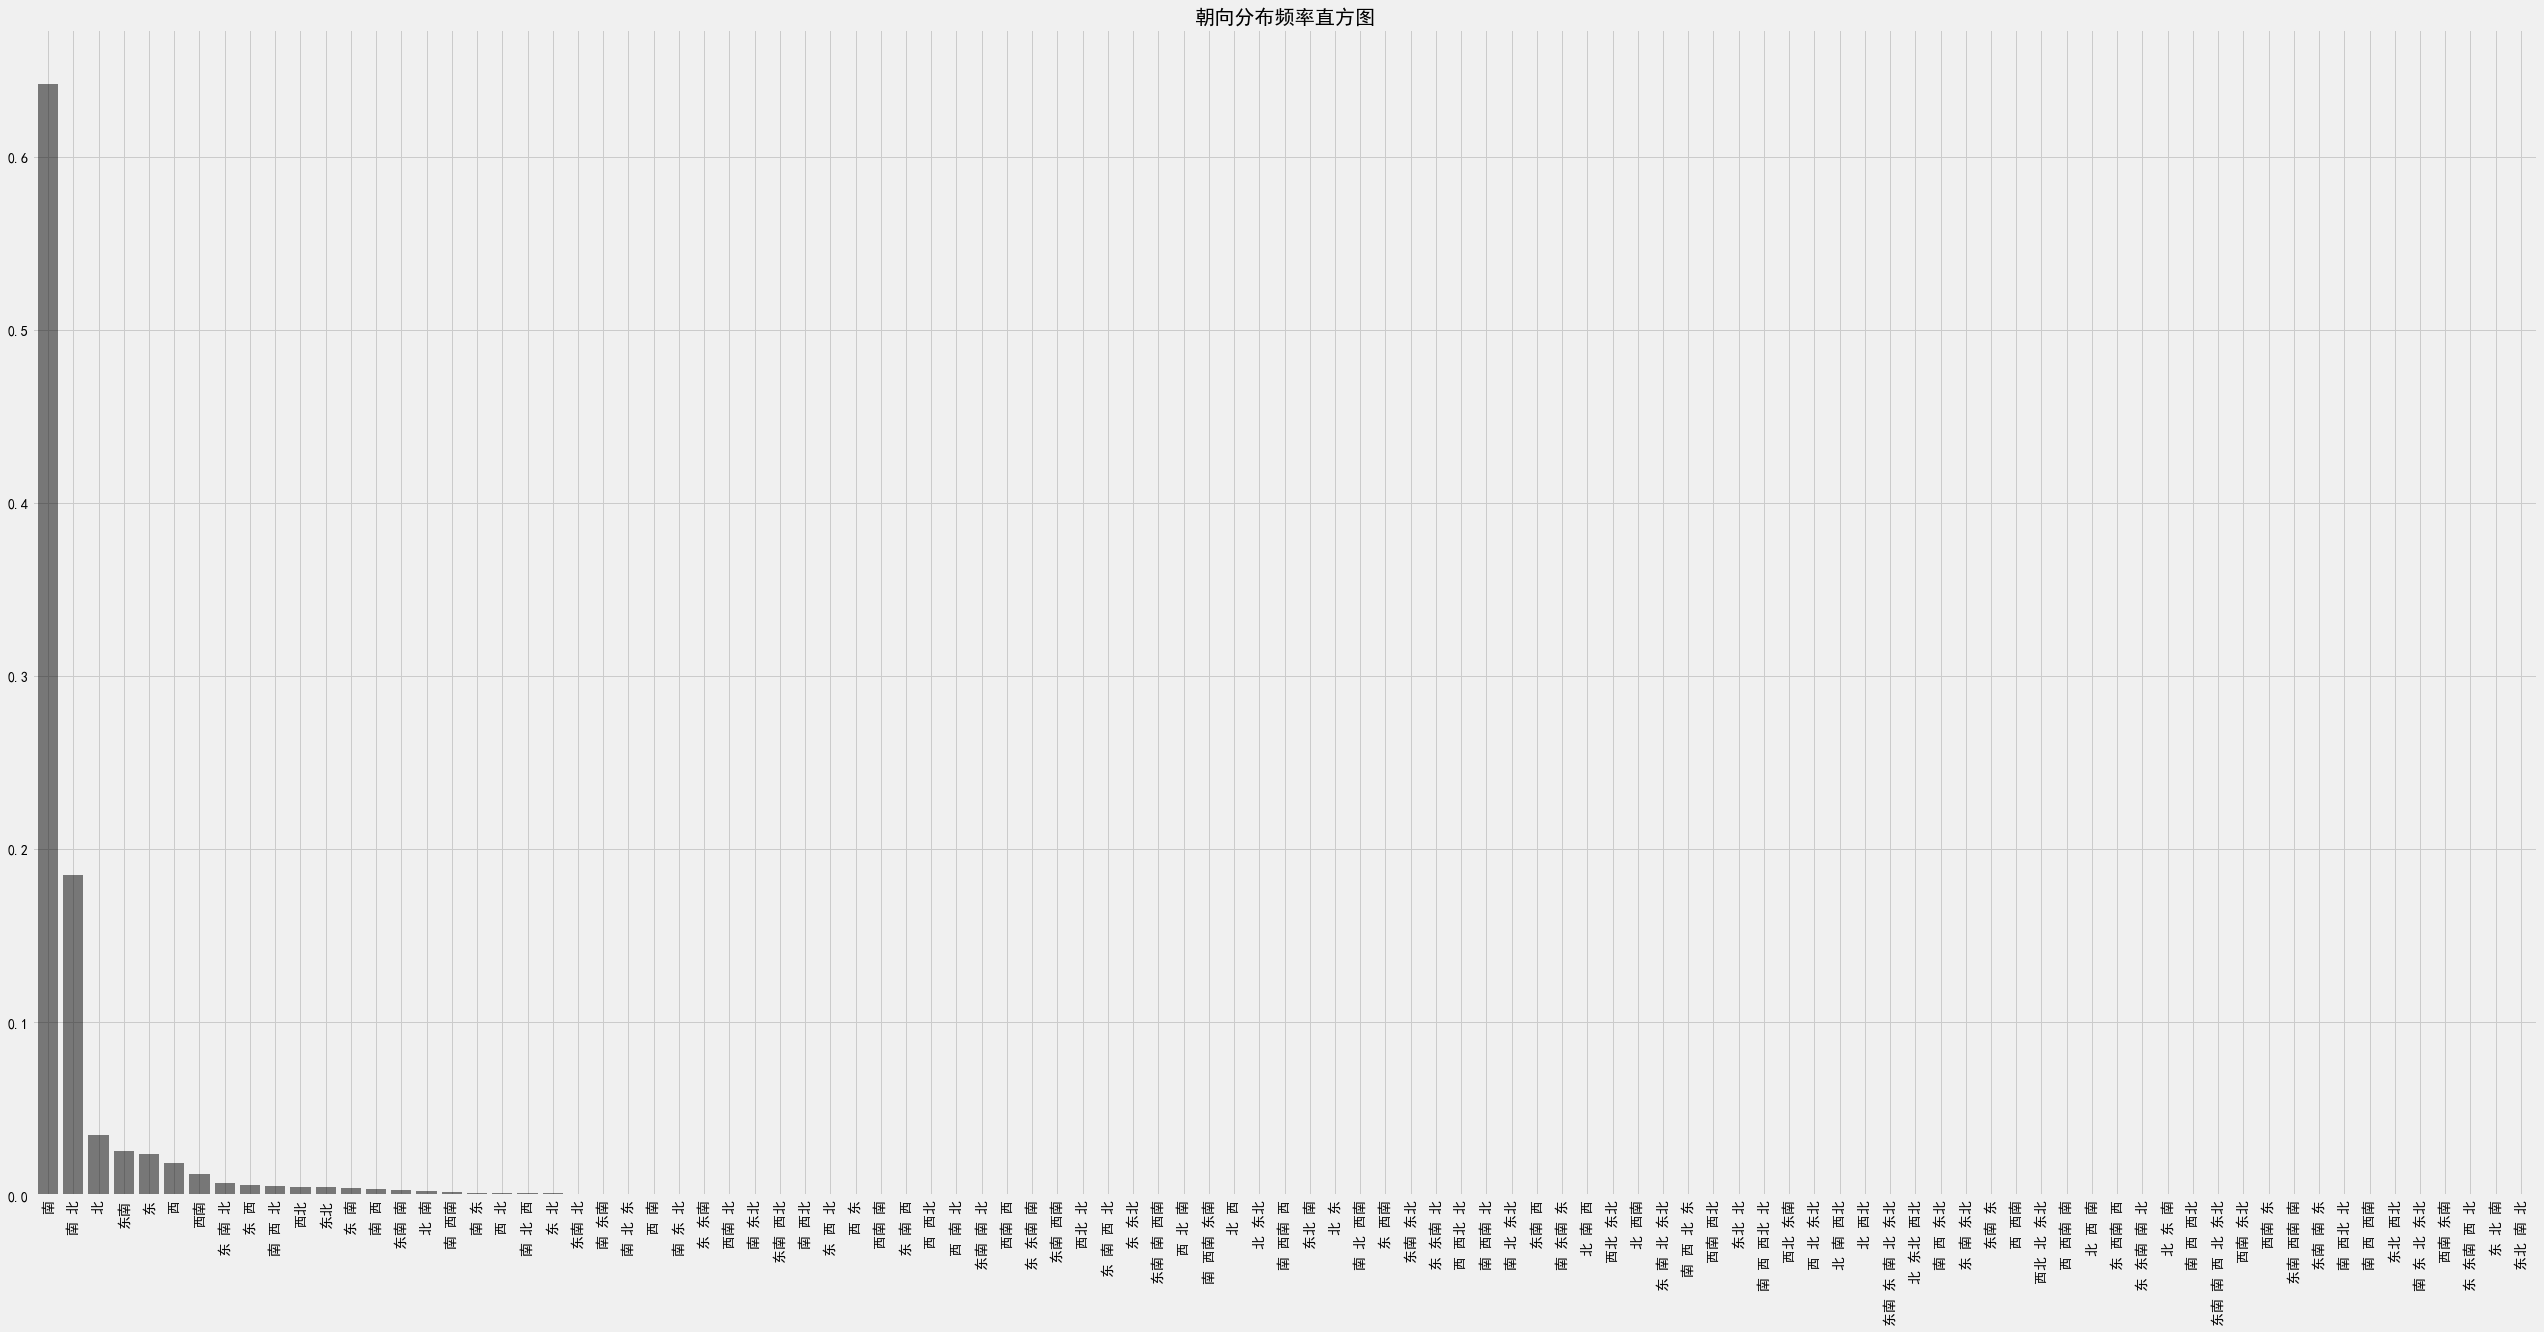

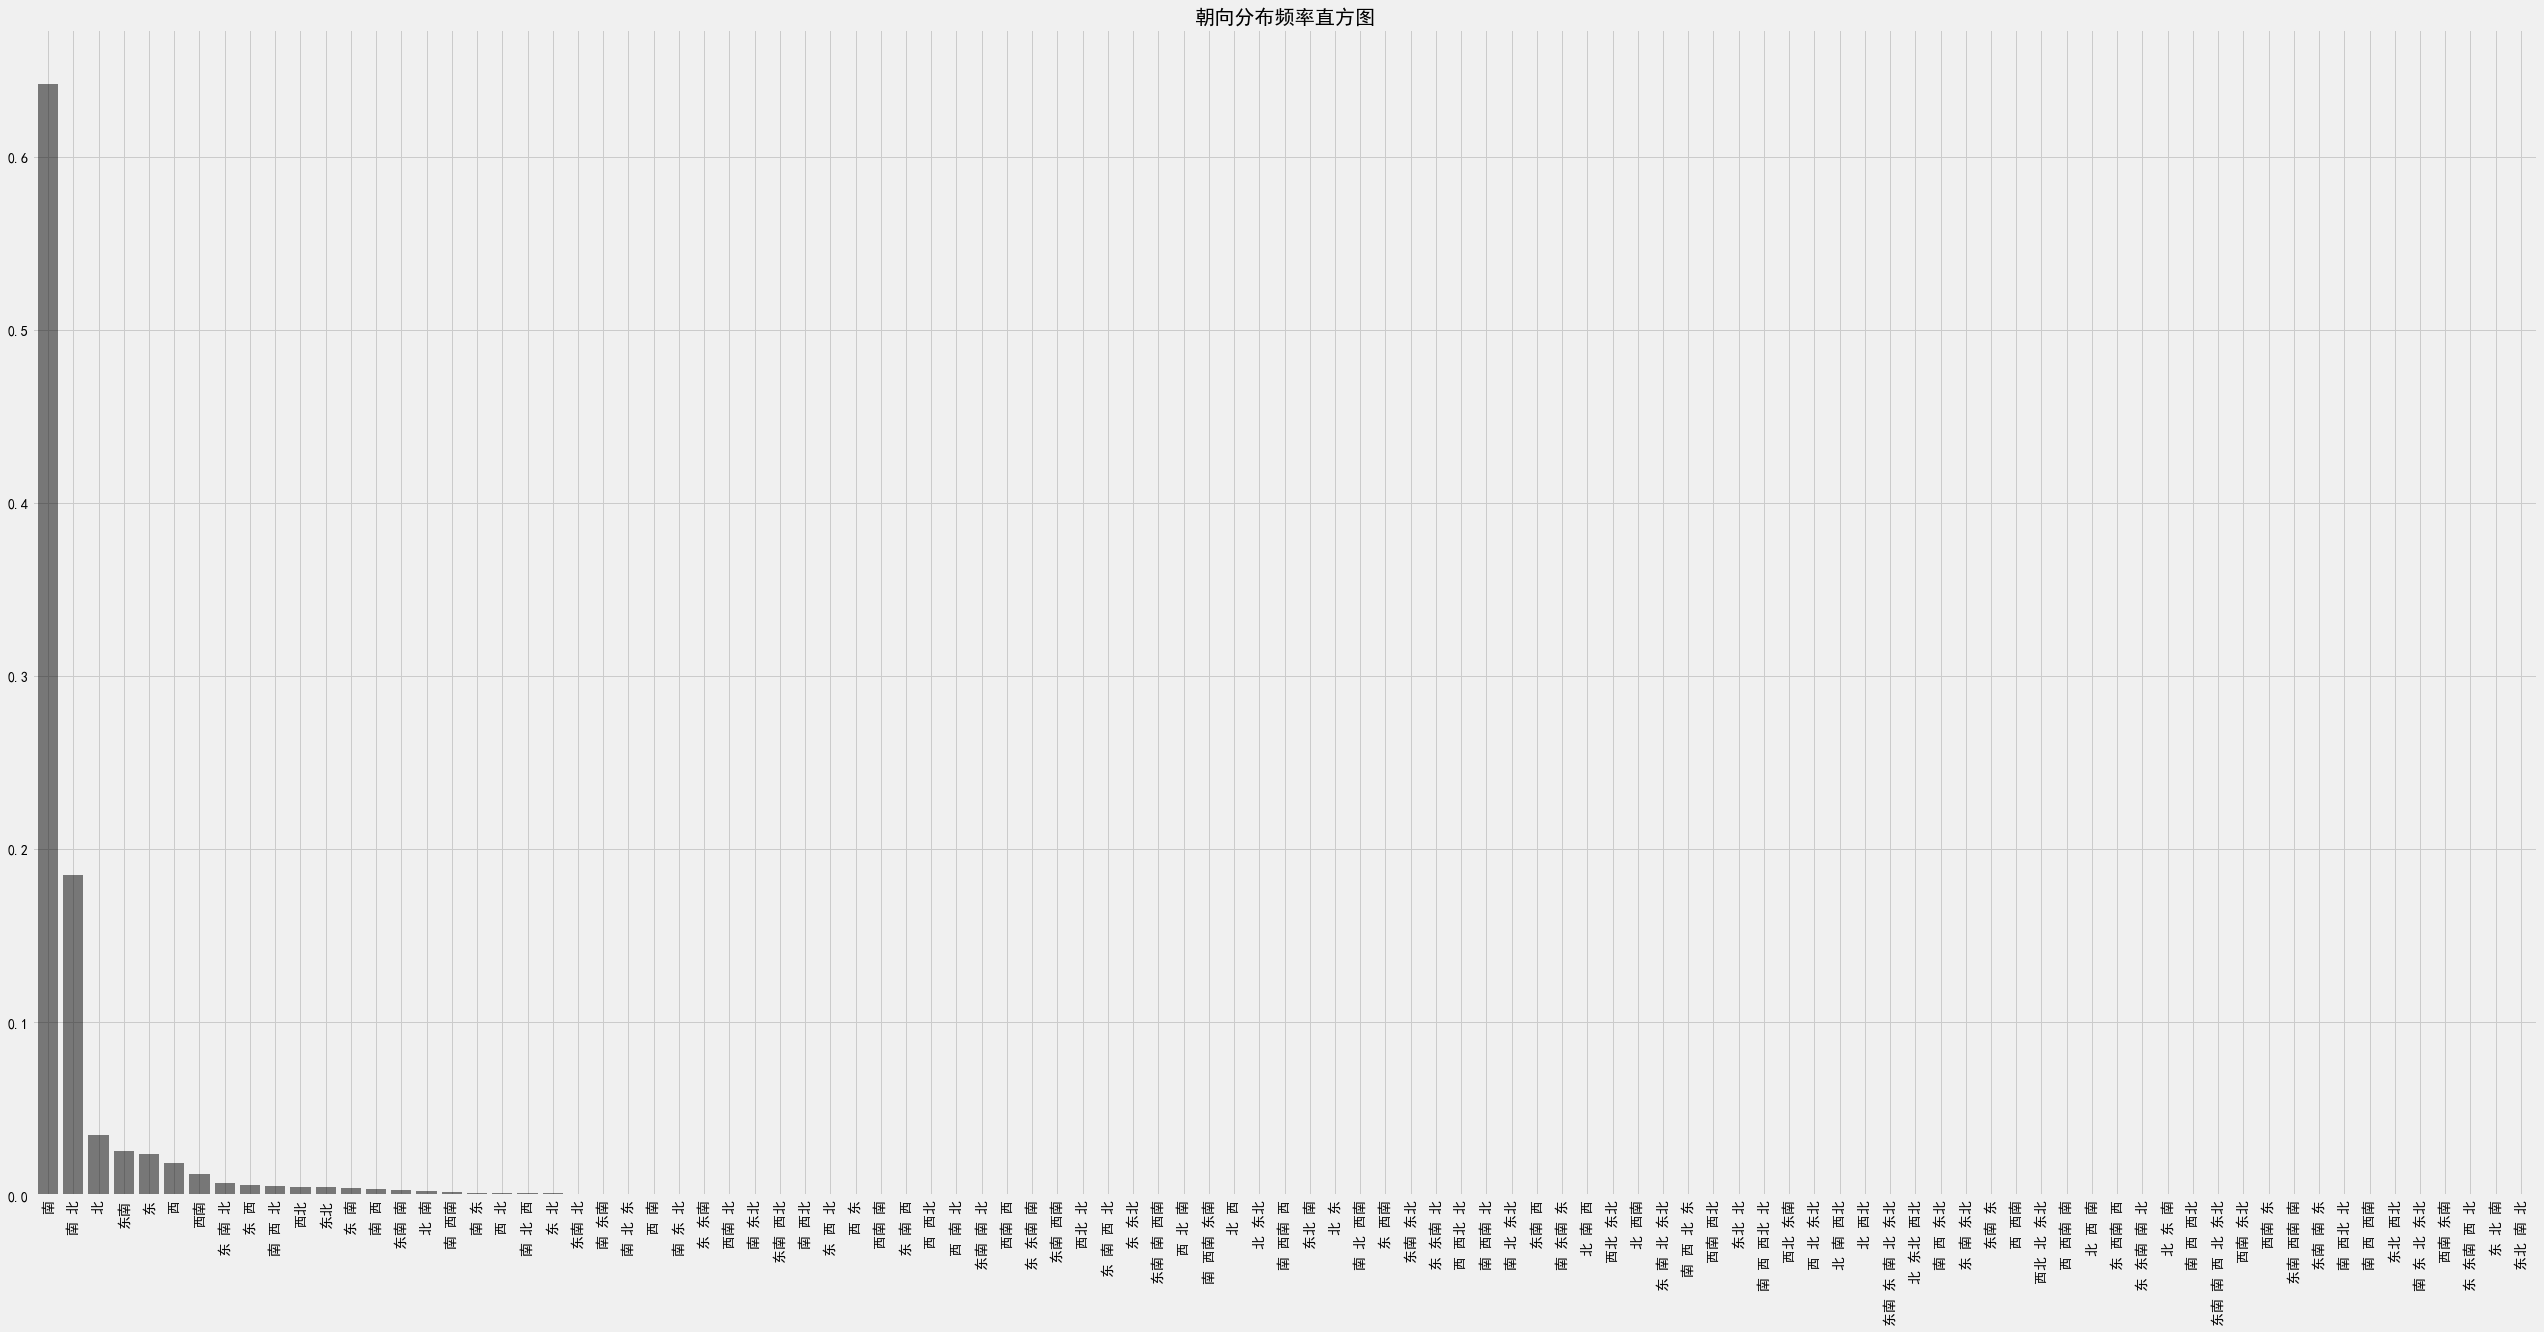

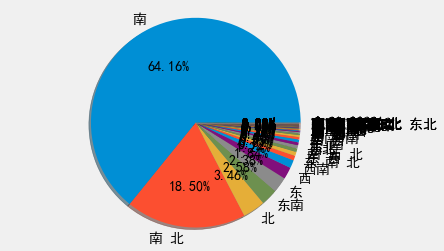

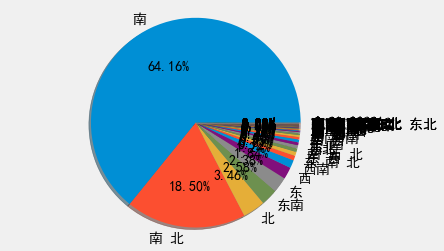

In [12]:
# 定性字段 除直方图外，绘制饼图
plt.figure(num=1,figsize=(40,20))
r_cx['频率'].plot(kind='bar',width=0.8,rot=0,color='k',grid=True,alpha=0.5)
plt.xticks(rotation=90)
plt.title("朝向分布频率直方图")

plt.figure(num = 2)
plt.pie(r_cx['频数'],
       labels = r_cx.index,
       autopct='%.2f%%',
       shadow = True)
plt.axis("equal")

In [13]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('houseRegion')['houseAllPrice'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('houseRegion')['houseUnitPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

Text(0, 0.5, '房屋总价')

Text(0, 0.5, '房屋总价')

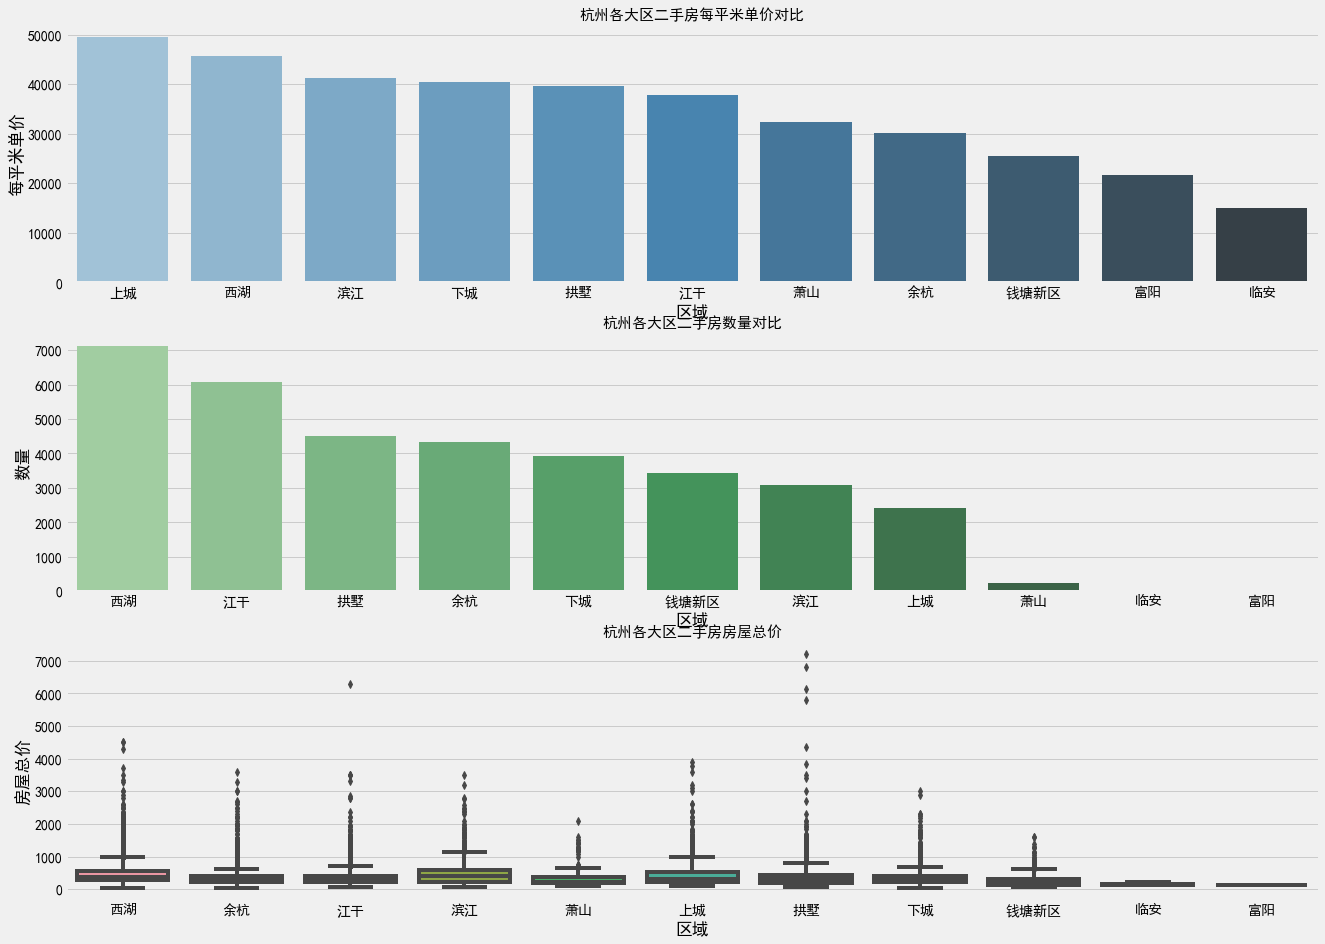

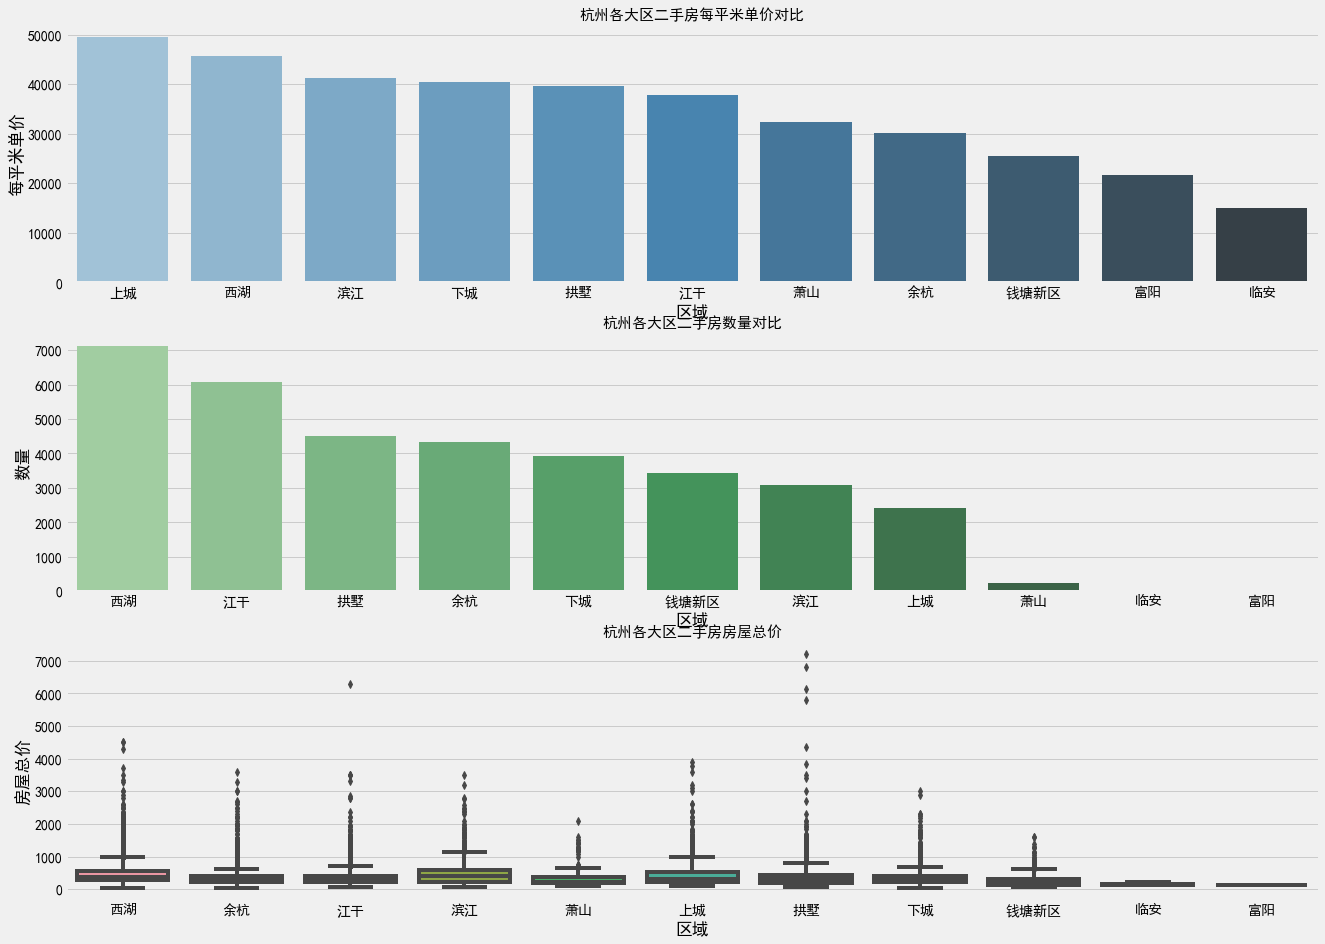

In [14]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='houseRegion', y='houseUnitPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('杭州各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='houseRegion', y='houseAllPrice', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('杭州各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='houseRegion', y='houseAllPrice', data=df, ax=ax3)
ax3.set_title('杭州各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

二手房均价：上城区的房价最贵均价大约5万/平，然后是西湖区大约4.5万/平，滨江、下城、拱墅等相差不大，临安最低，可能是属于郊区的缘故。

二手房房数量：从数量统计上来看，目前二手房市场上比较火热的区域。西湖区和江干区二手房数量最多，差不多都接近7000套，毕竟大区，需求量也大。

二手房总价：通过箱型图看到，各大区域房屋总价中位数都都在1000万以下，且房屋总价离散值较高，拱墅最高达到了7000万，说明房屋价格特征不是理想的正太分布。

In [15]:
data.loc[data['houseAllPrice'] == data.houseAllPrice.max()]

,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude,houseAllPriceRange
8513,1.030000e+11,武林壹号,南,5室2厅1厨4卫,有,拱墅,湖墅,NaN,高楼层 (共21层),640.59,精装,112397,7200.0,2015.0,30.283487,120.164747,"[7056.52, 7207.174)"


,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude,houseAllPriceRange
8513,1.030000e+11,武林壹号,南,5室2厅1厨4卫,有,拱墅,湖墅,NaN,高楼层 (共21层),640.59,精装,112397,7200.0,2015.0,30.283487,120.164747,"[7056.52, 7207.174)"


d:\program files\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\program files\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


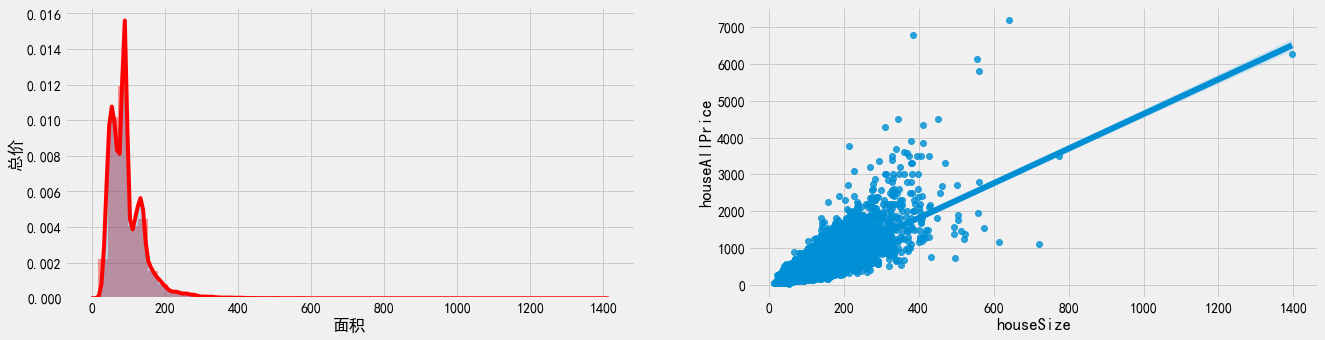

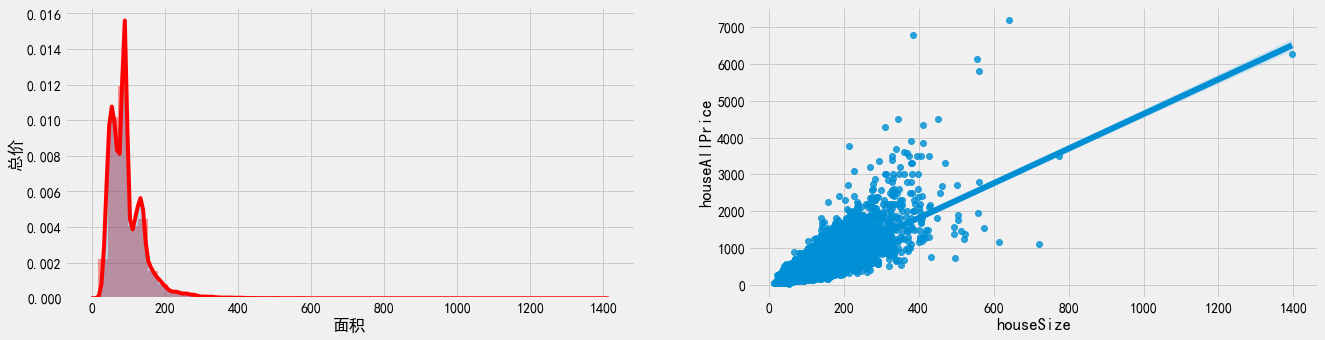

In [16]:
 f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 5))
# 建房面积的分布情况
sns.distplot(data['houseSize'], bins=50, ax=ax1, color='r')
sns.kdeplot(data['houseSize'],shade=True, ax=ax1)
# 建房面积和出售价格的关系
sns.regplot(x='houseSize', y='houseAllPrice', data=data, ax=ax2)
ax1.set_xlabel('面积')
ax1.set_ylabel('总价')
plt.show()

In [17]:
data.loc[data['houseSize']>500]

,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude,houseAllPriceRange
540,1.030000e+11,溪上玫瑰园,南,5室3厅1厨3卫,NaN,余杭,翡翠城,NaN,低楼层 (共3层),501.46,精装,53843,2700.0,2013.0,30.255870,120.026363,"[2608.64, 2752.12)"
2372,1.030000e+11,水印城,南,6室3厅1厨2卫,有,滨江,长河,NaN,高楼层 (共32层),503.92,精装,37705,1900.0,2008.0,30.209132,120.199562,"[1891.24, 2034.72)"
2398,1.030000e+11,水印城,南,6室3厅1厨2卫,有,滨江,长河,NaN,高楼层 (共32层),504.00,毛坯,34723,1750.0,2008.0,30.209132,120.199562,"[1747.76, 1891.24)"
3793,1.030000e+11,润和信雅达国际,北 南,4室2厅0厨2卫,有,滨江,滨江区政府,NaN,低楼层 (共47层),513.00,精装,28207,1447.0,2000.0,30.214118,120.204624,"[1317.32, 1460.8)"
8513,1.030000e+11,武林壹号,南,5室2厅1厨4卫,有,拱墅,湖墅,NaN,高楼层 (共21层),640.59,精装,112397,7200.0,2015.0,30.283487,120.164747,"[7056.52, 7207.174)"
8568,1.030000e+11,武林壹号,南,5室2厅2厨6卫,有,拱墅,湖墅,NaN,高楼层 (共21层),556.79,精装,110042,6127.0,2015.0,30.283487,120.164747,"[6052.16, 6195.64)"
8631,1.030000e+11,武林壹号,南,6室2厅2厨6卫,有,拱墅,湖墅,NaN,高楼层 (共21层),561.24,精装,103343,5800.0,2015.0,30.283487,120.164747,"[5765.2, 5908.68)"
11154,1.030000e+11,杭州来福士中心,南,1室1厅1厨1卫,有,江干,钱江新城,NaN,低楼层 (共60层),561.70,毛坯,49849,2800.0,2016.0,30.255195,120.219126,"[2752.12, 2895.6)"
11163,1.030000e+11,钱塘航空大厦,东南,5室0厅0厨0卫,有,江干,钱江新城,近地铁4号线城星路站,低楼层 (共37层),774.78,毛坯,44994,3486.0,2012.0,30.243317,120.215114,"[3469.52, 3613.0)"
11164,1.030000e+11,钱塘航空大厦,南,9室0厅0厨0卫,有,江干,钱江新城,近地铁4号线城星路站,低楼层 (共37层),1396.51,精装,44998,6284.0,2012.0,30.243317,120.215114,"[6195.64, 6339.12)"


,houseCode,houseName,houseDirection,houseType,houseElevator,houseRegion,houseDistrict,houseAddress,houseFloor,houseSize,houseStatus,houseUnitPrice,houseAllPrice,houseYear,Latitude,Longitude,houseAllPriceRange
540,1.030000e+11,溪上玫瑰园,南,5室3厅1厨3卫,NaN,余杭,翡翠城,NaN,低楼层 (共3层),501.46,精装,53843,2700.0,2013.0,30.255870,120.026363,"[2608.64, 2752.12)"
2372,1.030000e+11,水印城,南,6室3厅1厨2卫,有,滨江,长河,NaN,高楼层 (共32层),503.92,精装,37705,1900.0,2008.0,30.209132,120.199562,"[1891.24, 2034.72)"
2398,1.030000e+11,水印城,南,6室3厅1厨2卫,有,滨江,长河,NaN,高楼层 (共32层),504.00,毛坯,34723,1750.0,2008.0,30.209132,120.199562,"[1747.76, 1891.24)"
3793,1.030000e+11,润和信雅达国际,北 南,4室2厅0厨2卫,有,滨江,滨江区政府,NaN,低楼层 (共47层),513.00,精装,28207,1447.0,2000.0,30.214118,120.204624,"[1317.32, 1460.8)"
8513,1.030000e+11,武林壹号,南,5室2厅1厨4卫,有,拱墅,湖墅,NaN,高楼层 (共21层),640.59,精装,112397,7200.0,2015.0,30.283487,120.164747,"[7056.52, 7207.174)"
8568,1.030000e+11,武林壹号,南,5室2厅2厨6卫,有,拱墅,湖墅,NaN,高楼层 (共21层),556.79,精装,110042,6127.0,2015.0,30.283487,120.164747,"[6052.16, 6195.64)"
8631,1.030000e+11,武林壹号,南,6室2厅2厨6卫,有,拱墅,湖墅,NaN,高楼层 (共21层),561.24,精装,103343,5800.0,2015.0,30.283487,120.164747,"[5765.2, 5908.68)"
11154,1.030000e+11,杭州来福士中心,南,1室1厅1厨1卫,有,江干,钱江新城,NaN,低楼层 (共60层),561.70,毛坯,49849,2800.0,2016.0,30.255195,120.219126,"[2752.12, 2895.6)"
11163,1.030000e+11,钱塘航空大厦,东南,5室0厅0厨0卫,有,江干,钱江新城,近地铁4号线城星路站,低楼层 (共37层),774.78,毛坯,44994,3486.0,2012.0,30.243317,120.215114,"[3469.52, 3613.0)"
11164,1.030000e+11,钱塘航空大厦,南,9室0厅0厨0卫,有,江干,钱江新城,近地铁4号线城星路站,低楼层 (共37层),1396.51,精装,44998,6284.0,2012.0,30.243317,120.215114,"[6195.64, 6339.12)"


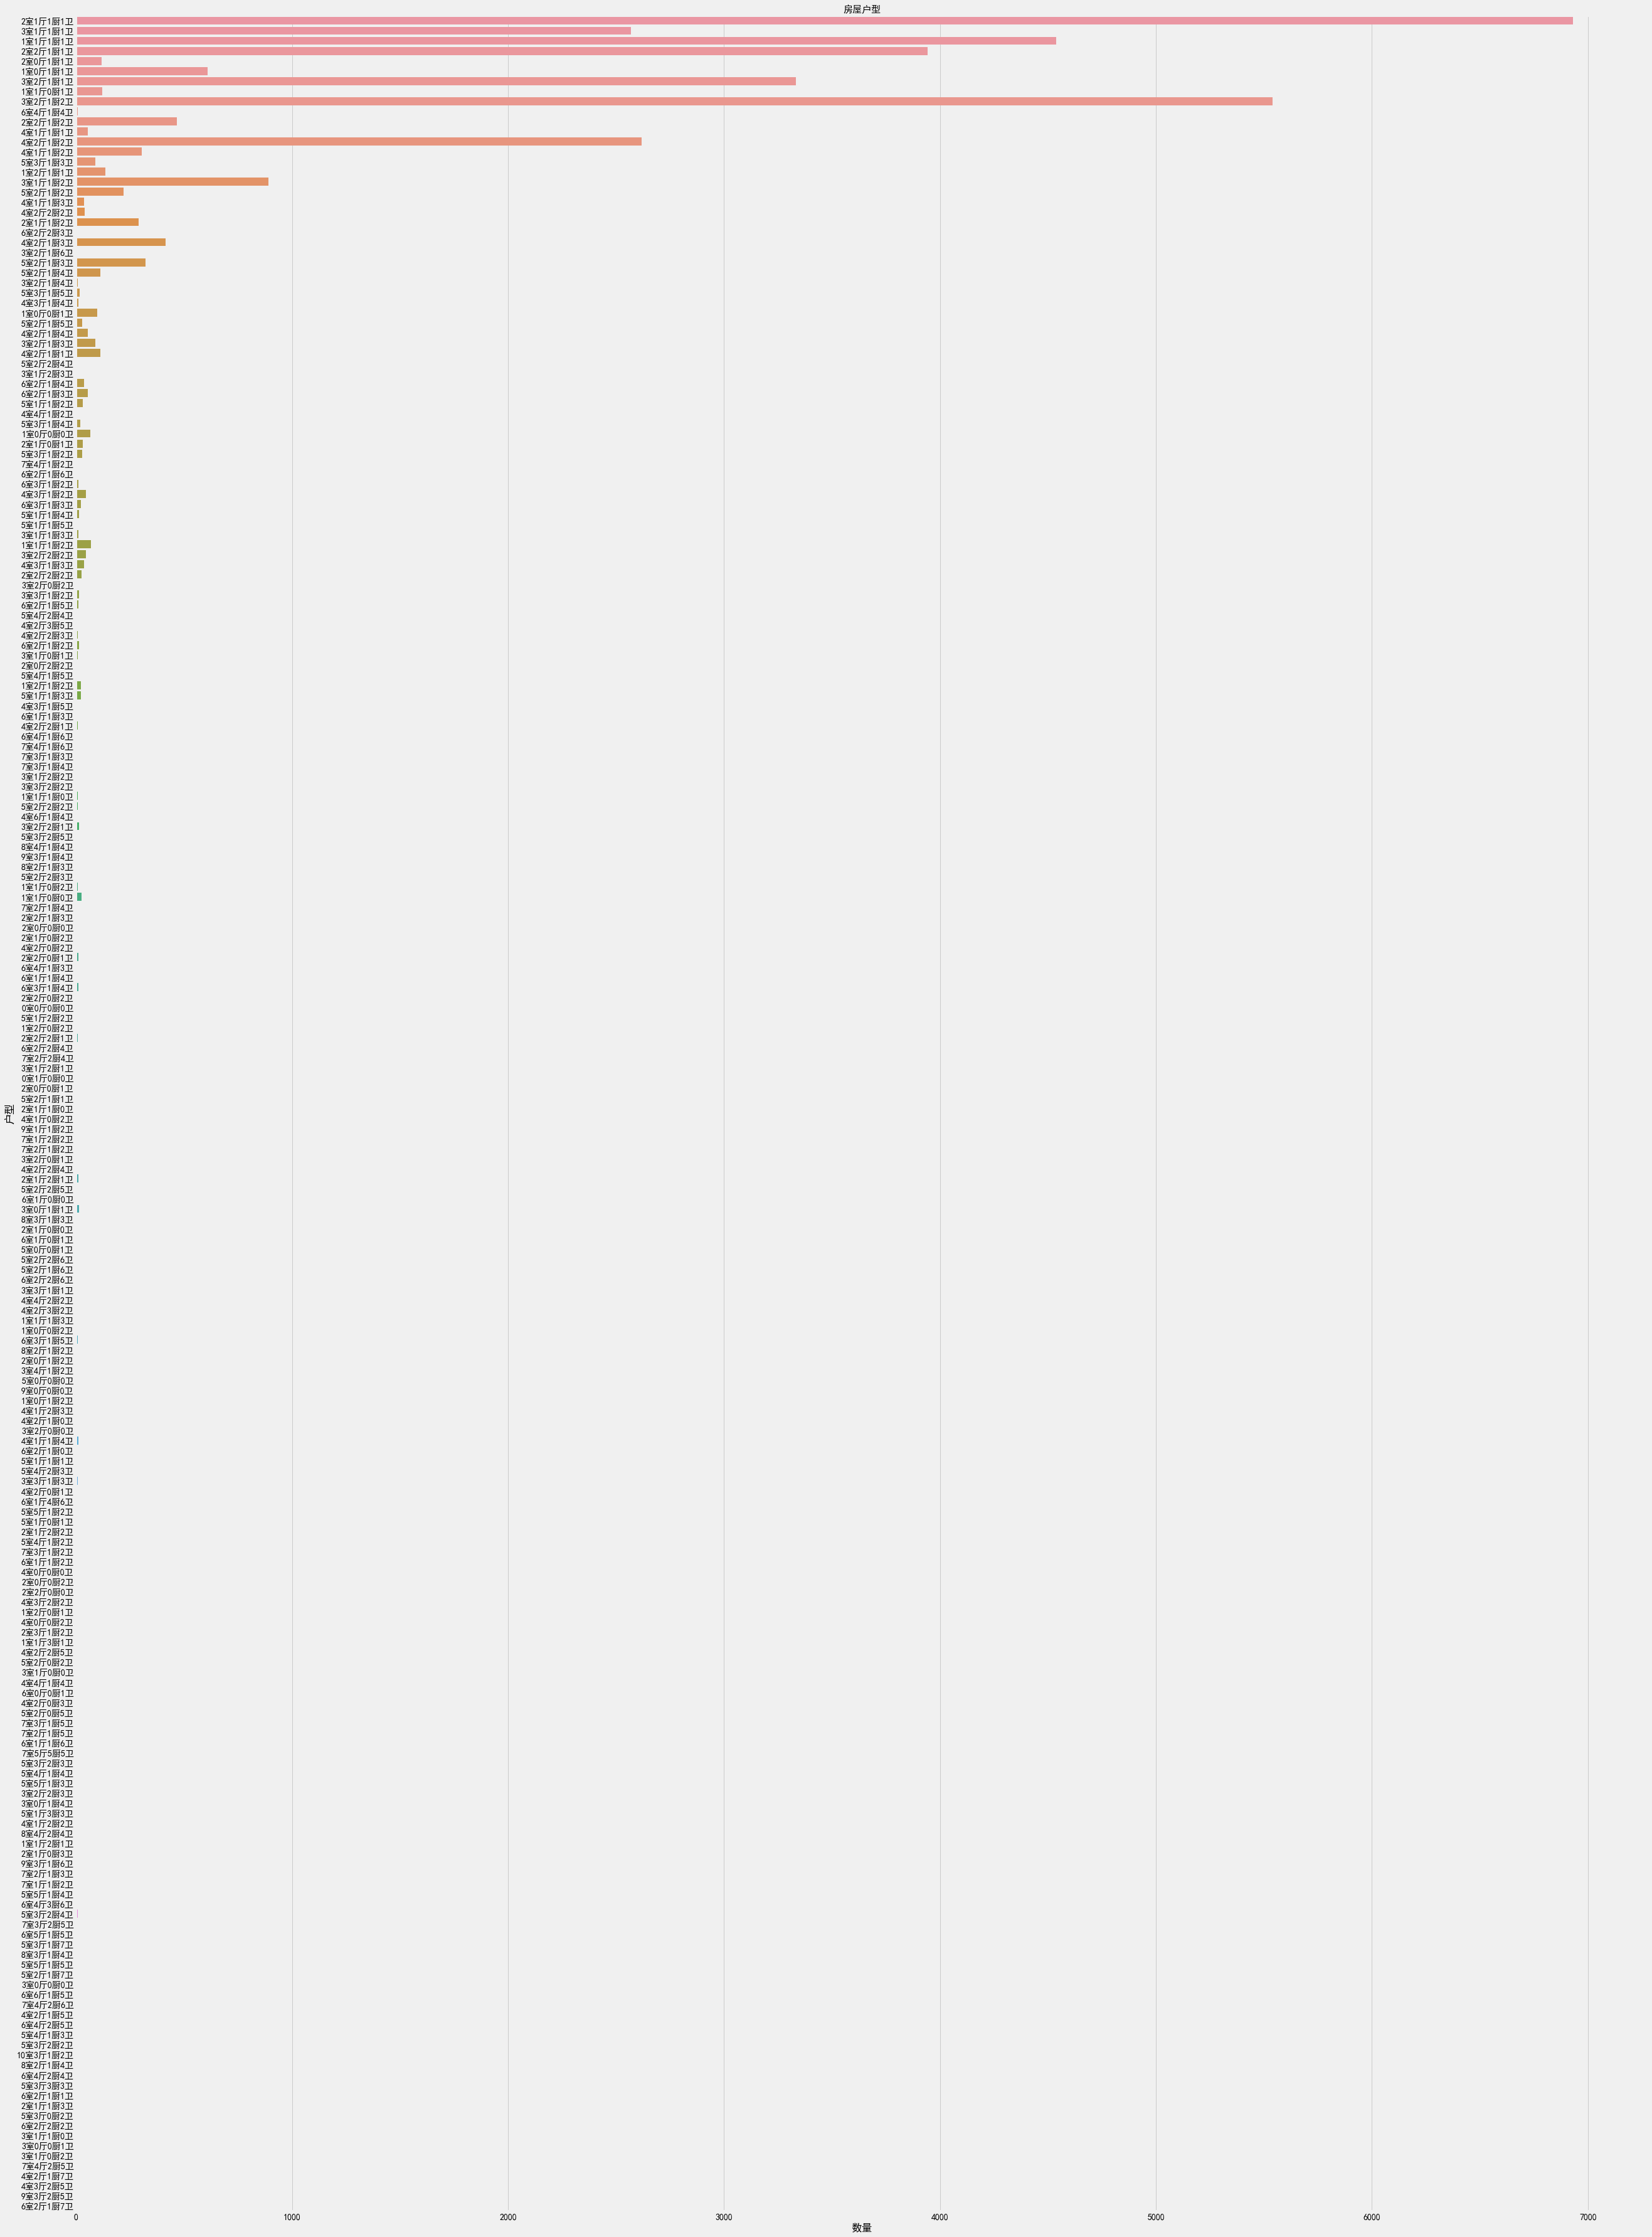

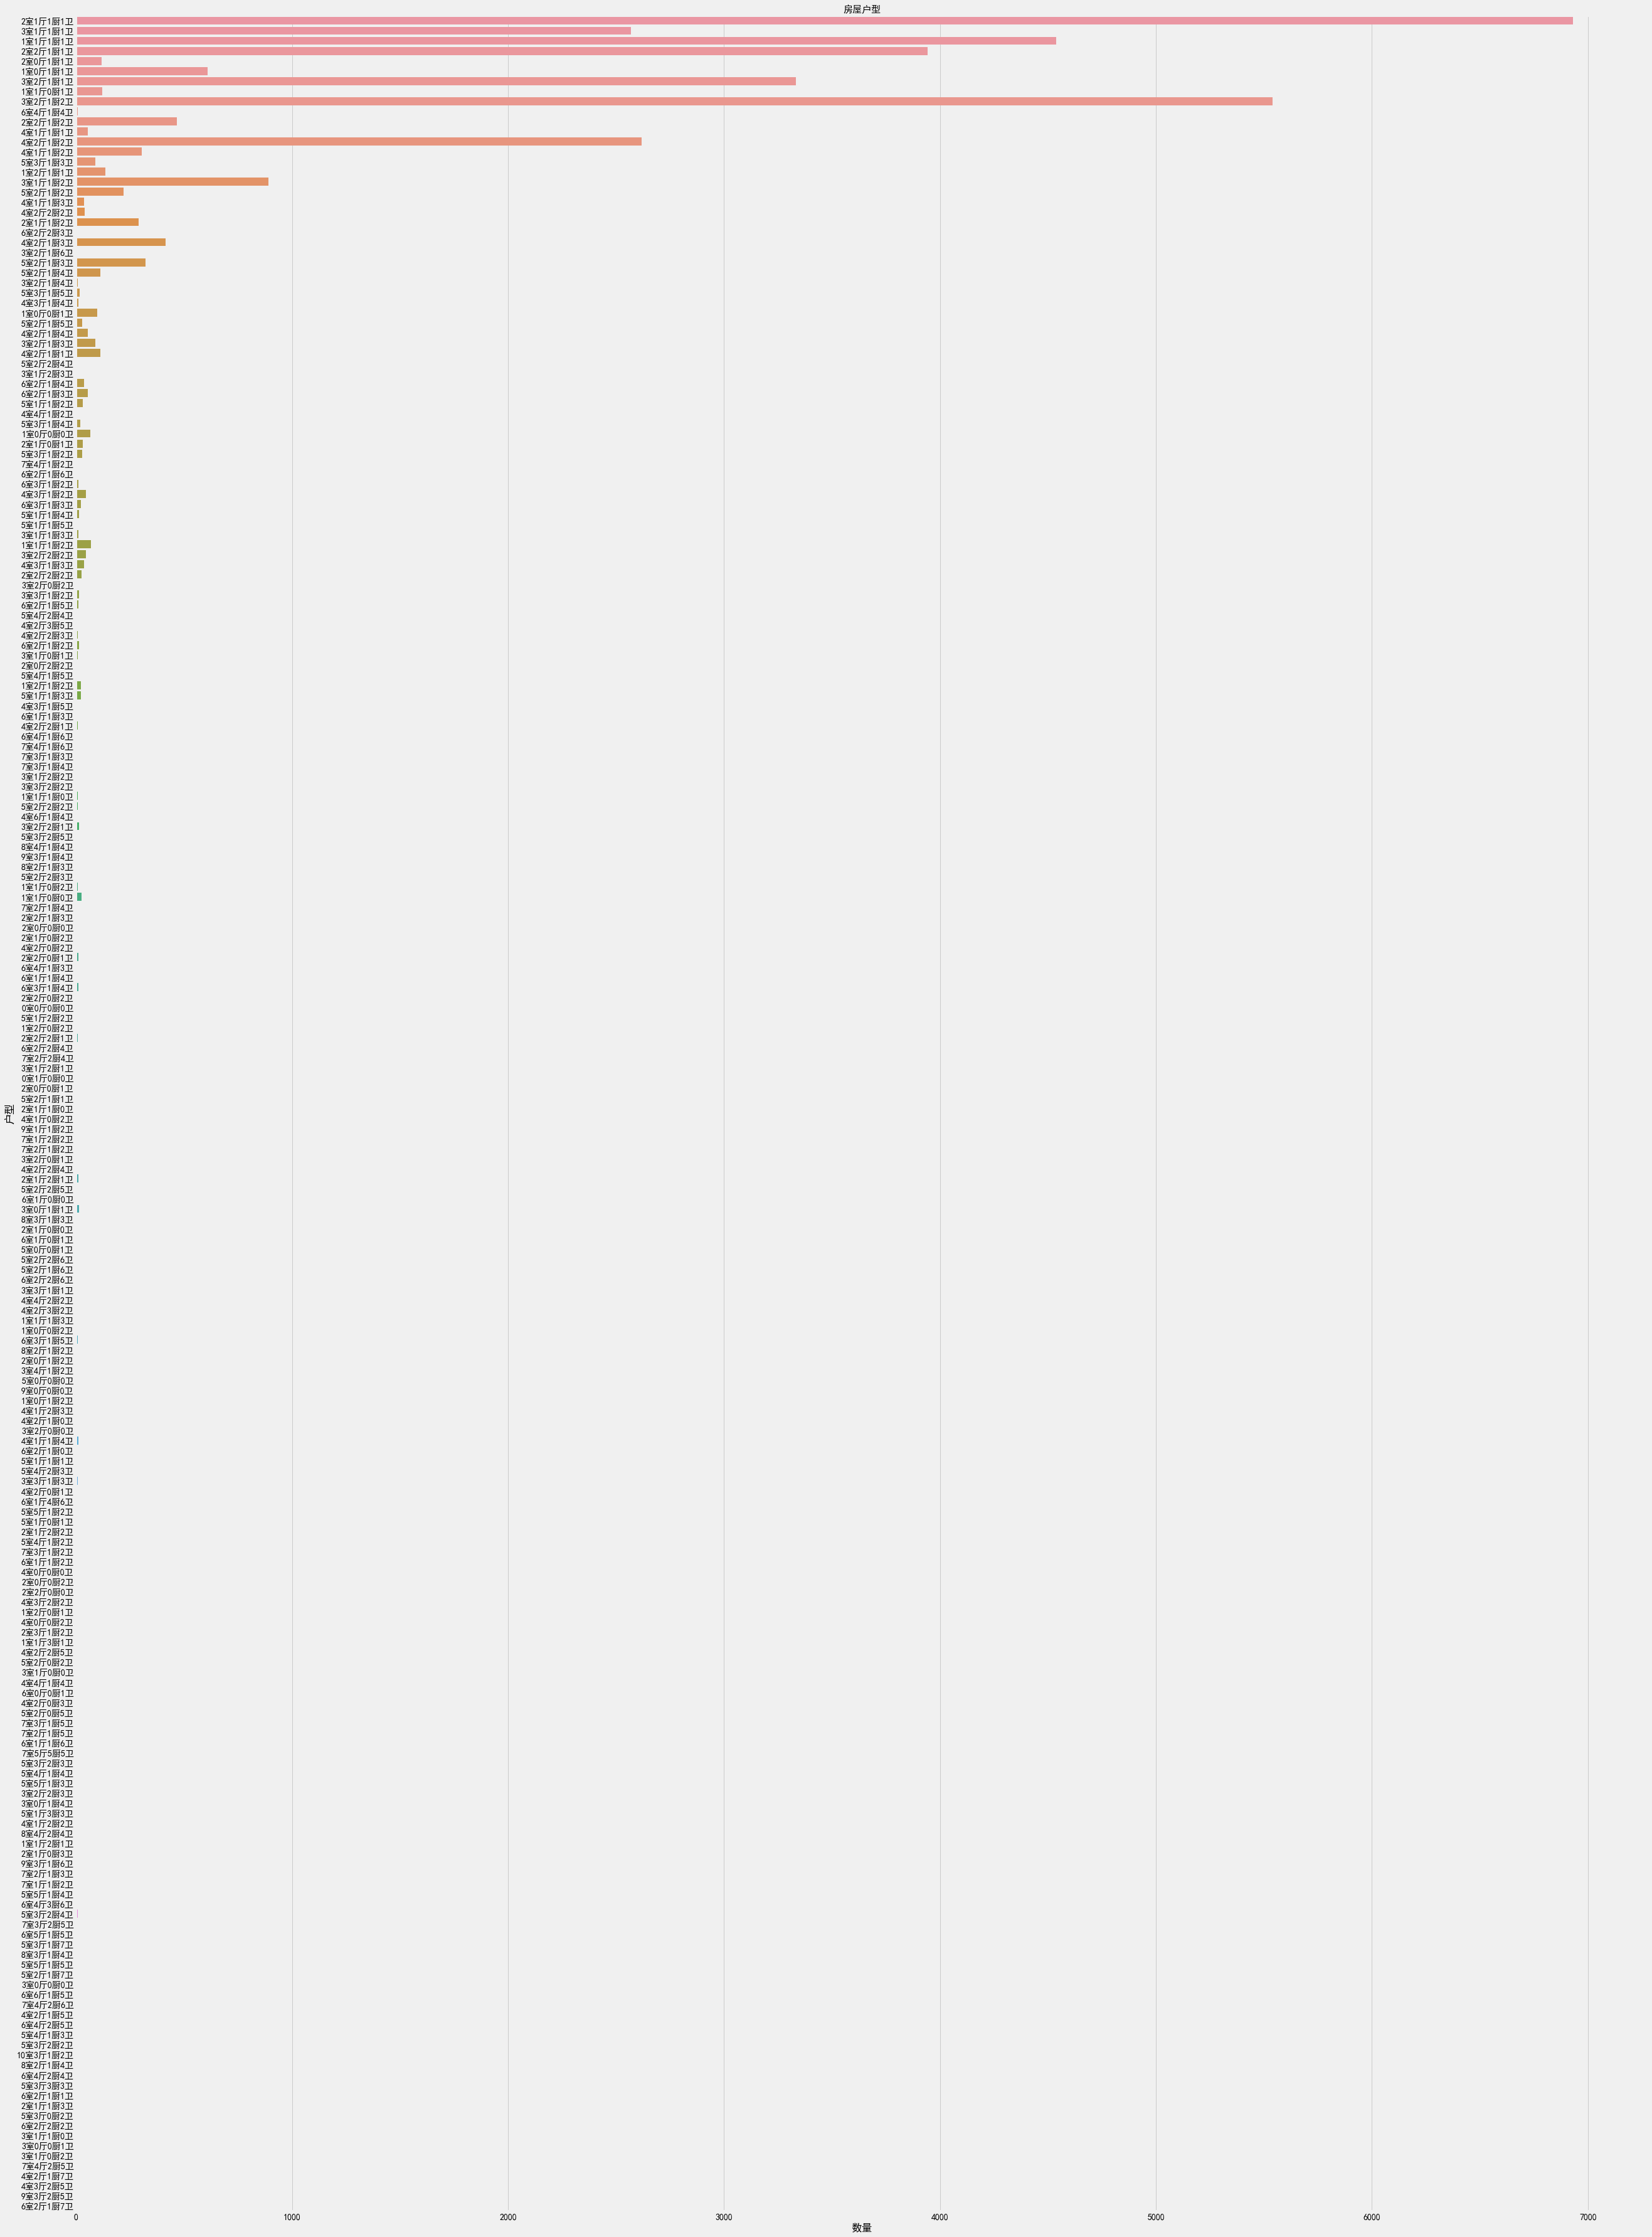

In [18]:
f, ax1= plt.subplots(figsize=(40,60))
sns.countplot(y='houseType', data=data, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

2室1厅占绝大部分，其次是3室2厅，2室2厅，1室1厅，3室1厅，特征命名总体较为规则。

In [19]:
data['houseStatus'].value_counts()

精装    17712
简装    13627
毛坯     3206
其他      630
Name: houseStatus, dtype: int64

精装    17712
简装    13627
毛坯     3206
其他      630
Name: houseStatus, dtype: int64

d:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


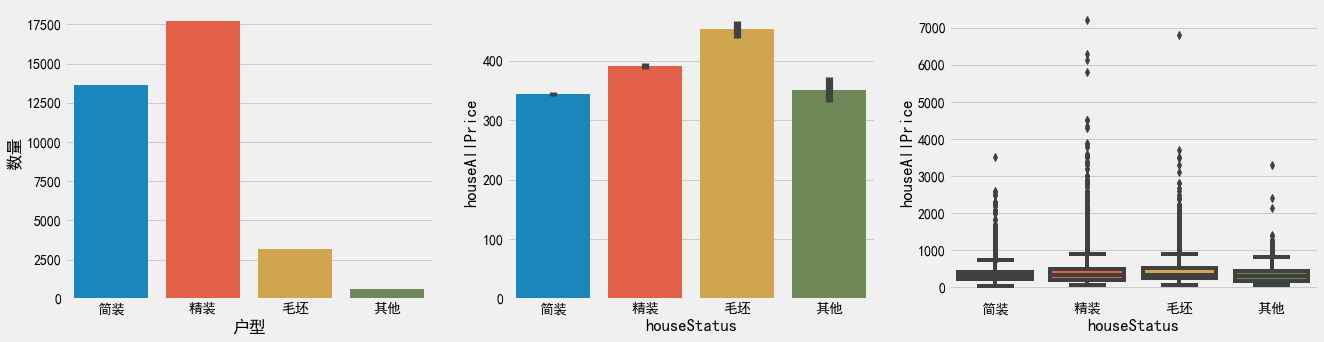

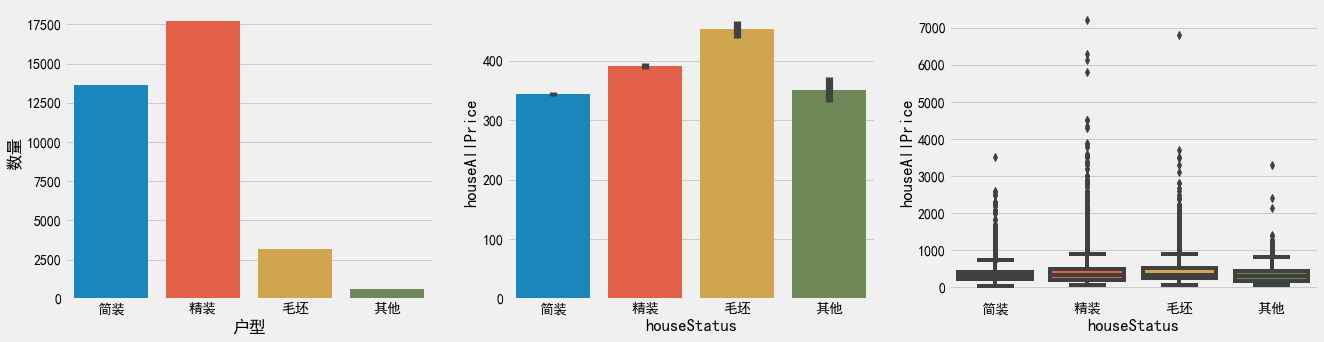

In [20]:
# 画幅设置
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(data['houseStatus'], ax=ax1)
ax1.set_xlabel('户型')
ax1.set_ylabel('数量')
sns.barplot(x='houseStatus', y='houseAllPrice', data=data, ax=ax2)
sns.boxplot(x='houseStatus', y='houseAllPrice', data=data, ax=ax3)
plt.show()

观察到，精装修的二手房数量最多，简装其次，也是我们平日常见的。而对于价格来说，毛坯类型却是最高，其次是精装修。

In [21]:
misn = len(data.loc[(data['houseElevator'].isnull()), 'houseElevator'])
print('houseElevator缺失值数量为：'+ str(misn))

houseElevator缺失值数量为：430
houseElevator缺失值数量为：430


针对缺失值：常用的方法有平均值/中位数填补法，直接移除，或者根据其他特征建模预测等。但是无电梯不是数值，不存在平均值和中位数，可以根据楼层高低判断有无。
这边因为才400多条且有暂无选项，填充为暂无数据。

d:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


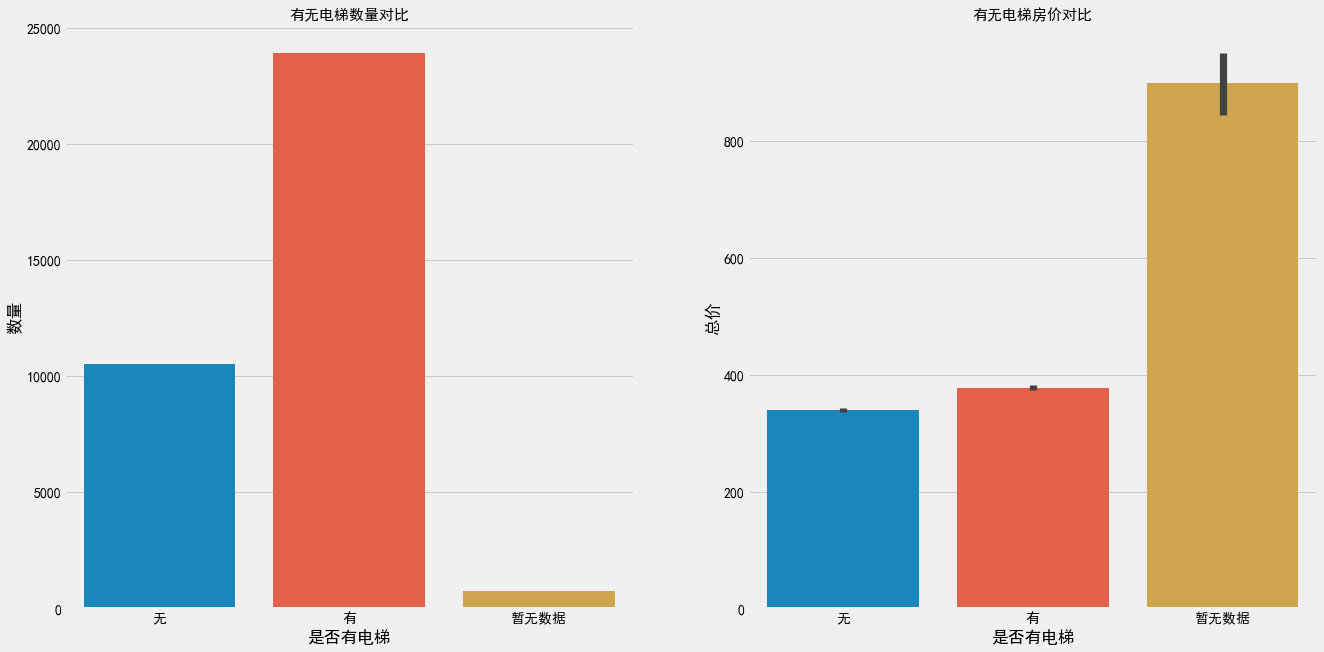

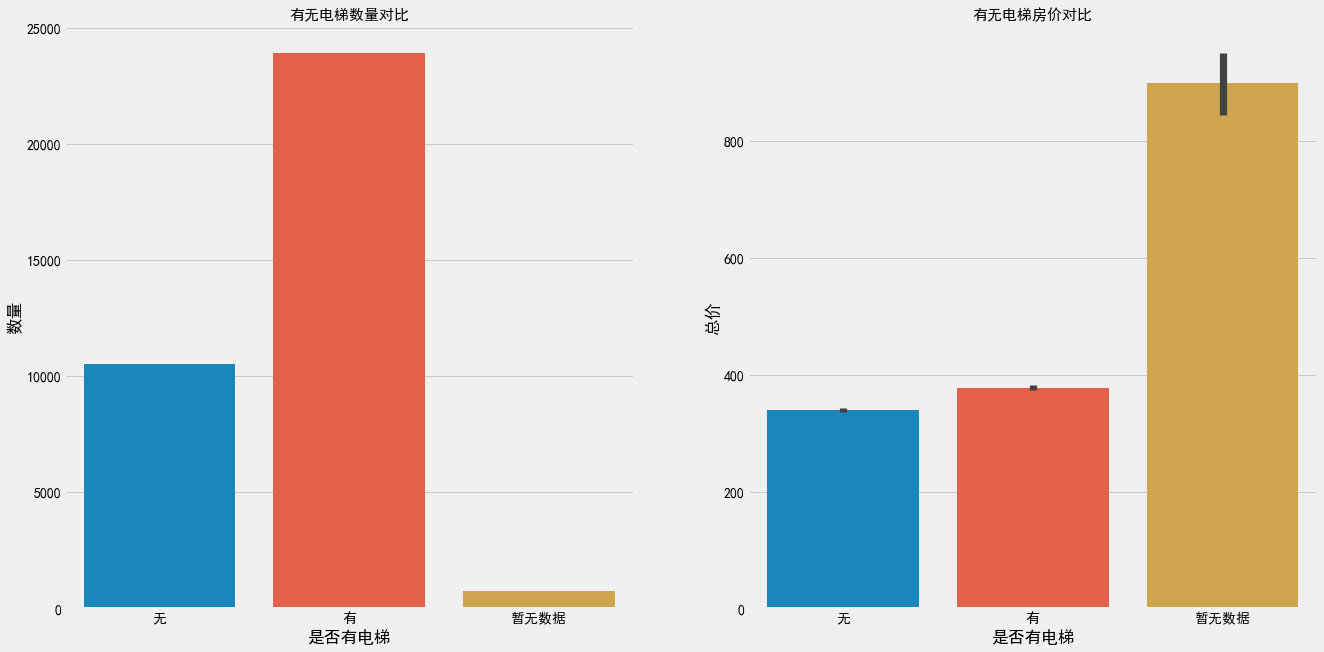

In [22]:
data.loc[(df['houseElevator'].isnull()), 'houseElevator'] = "暂无数据"
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(data['houseElevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')

sns.barplot(x='houseElevator', y='houseAllPrice', data=data, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

d:\program files\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\program files\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


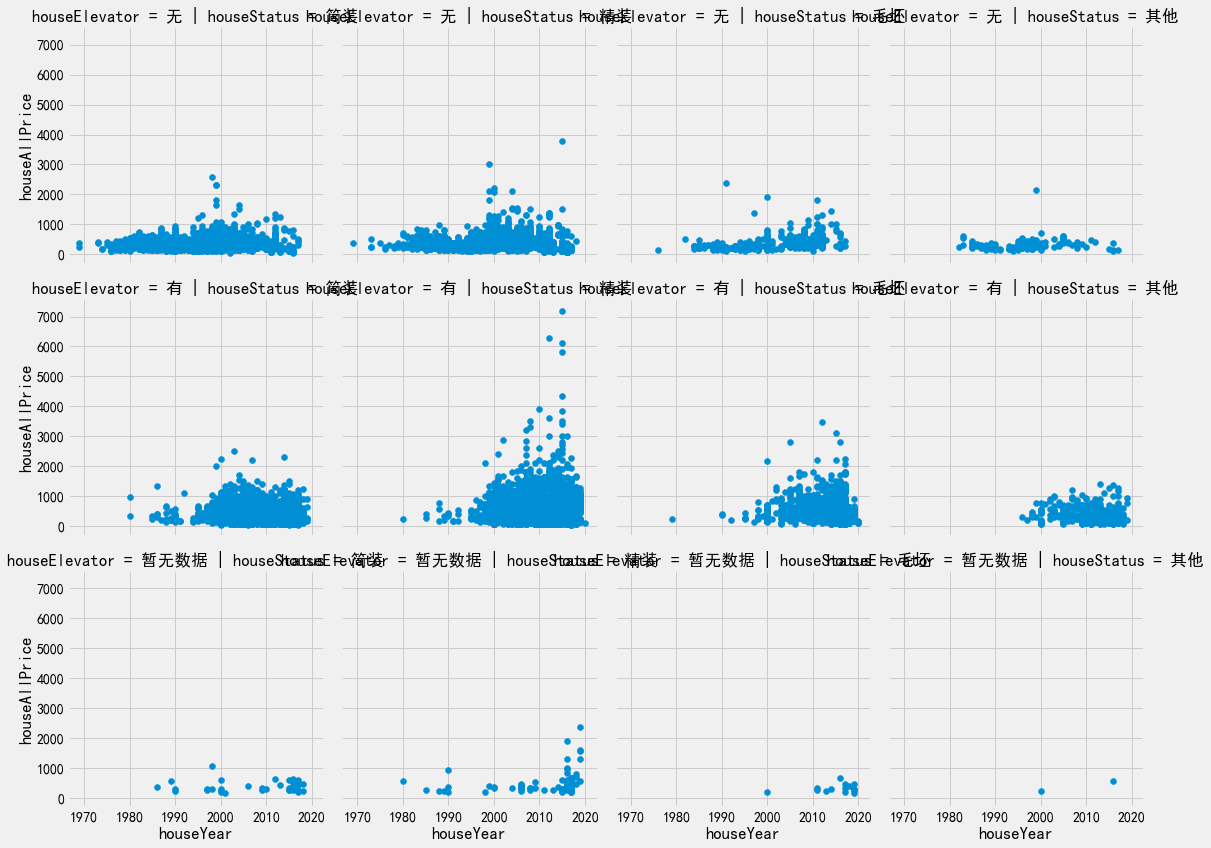

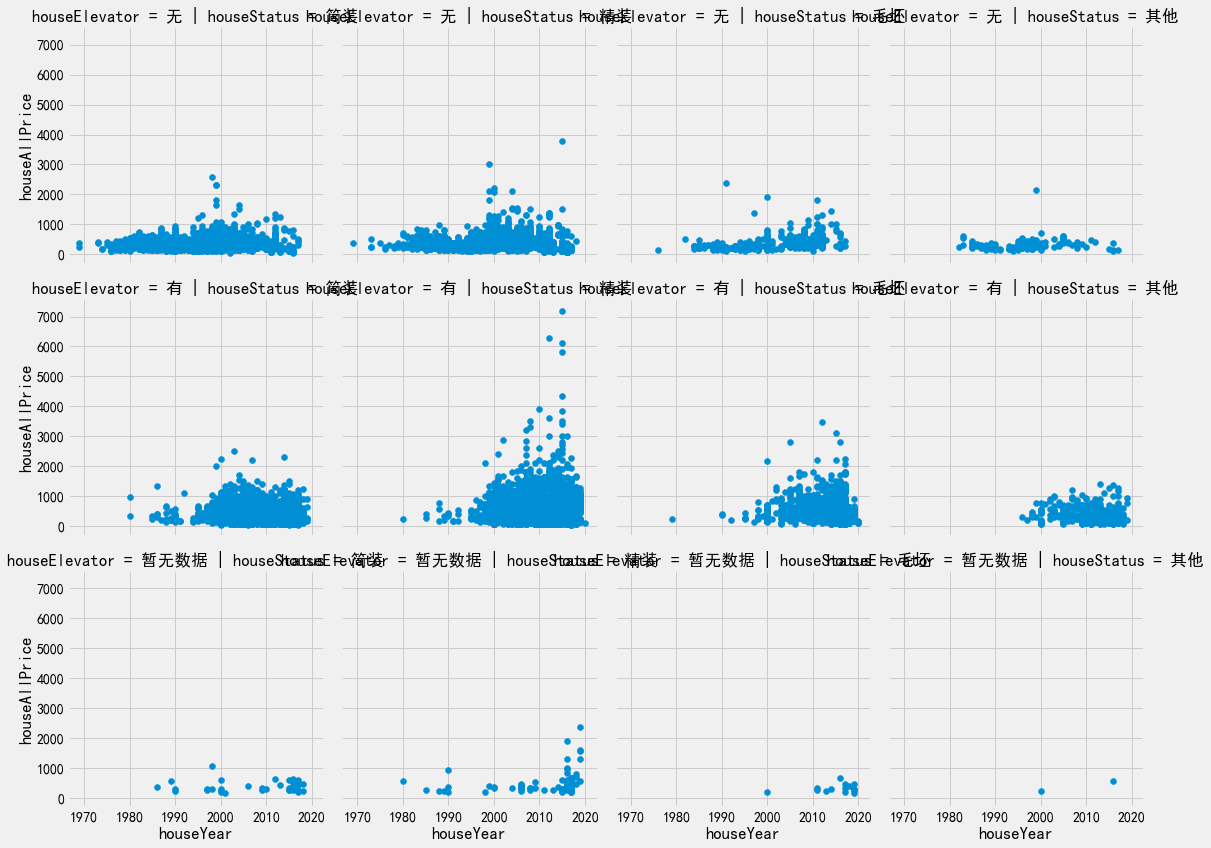

In [23]:
# 年份 装修 价格分析
grid = sns.FacetGrid(df, row='houseElevator', col='houseStatus', palette='seismic',size=4)
grid.map(plt.scatter, 'houseYear', 'houseAllPrice')
grid.add_legend()

<AxesSubplot:>

<AxesSubplot:>

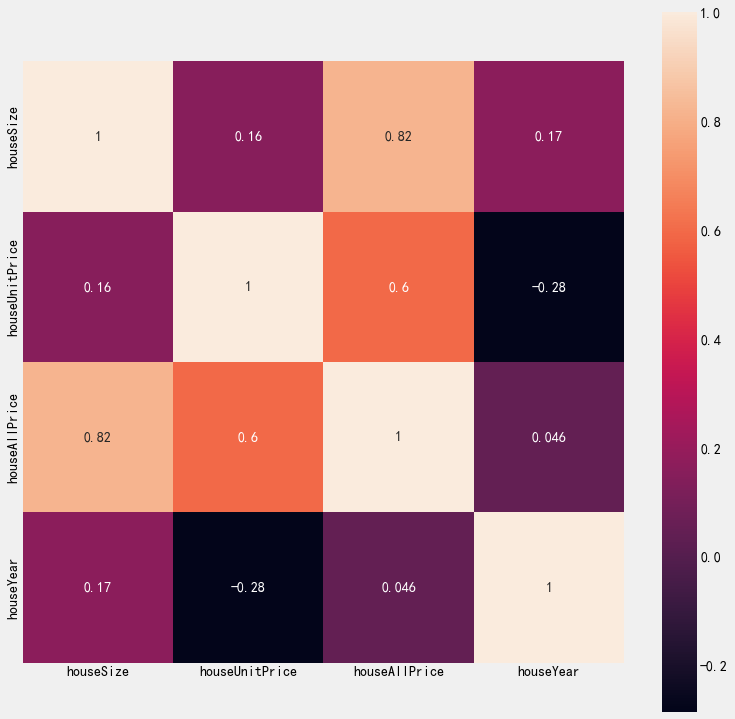

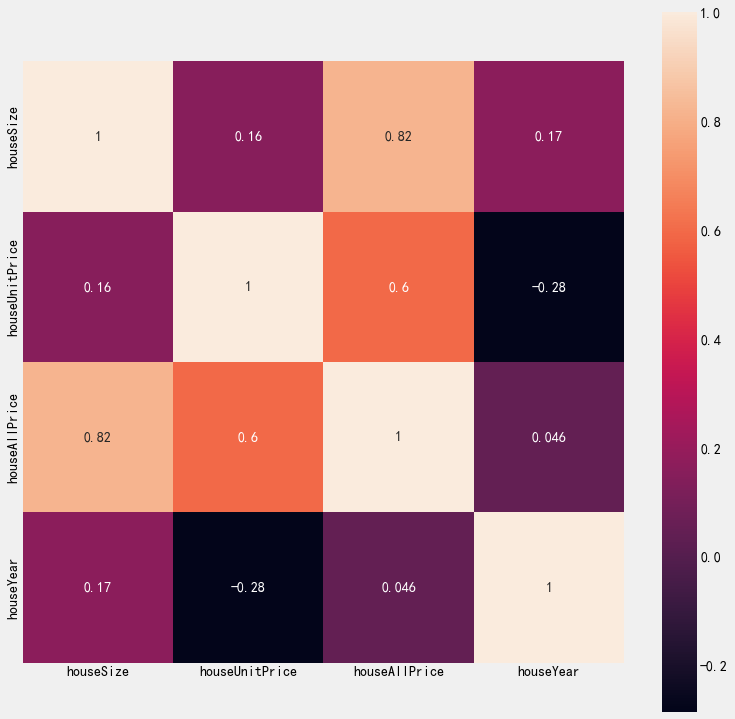

In [24]:
columns = ['houseSize','houseUnitPrice','houseAllPrice','houseYear']
dataNew = data[columns]
fig=plt.figure(figsize=(12,12))
sns.heatmap(dataNew.corr(),vmax=1,square=True,annot=True)

房价预测
- 数据清洗¶
可以看到，数据集中的数据类型有文本，类目，数值等。由于需要将数据集作为输入给机器学习模型计算，而数据类型统一为数值型才能计算，因此将数据类型全部转换为数值类型，以很好的为机器学习模型服务

In [25]:
# 完善数据集，删除无意义特征，将特征数字化
drop_out = ['houseCode', 'houseName', 'houseDirection', 'houseType','houseAddress','houseDistrict',
            'houseFloor','Latitude','Longitude','houseAllPriceRange','houseUnitPrice']
data = data.drop(drop_out, axis=1)
# print(data['houseAllPrice'].isnull().value_counts()) # 50 True
data.dropna(axis = 0, subset = ['houseAllPrice','houseYear','houseStatus'], inplace=True)

In [26]:
data.loc[data['houseElevator']=='暂无数据','houseElevator'] ='无'
data['houseElevator'].fillna(value = "无")
print(data['houseElevator'].value_counts())
data.isnull().any()

有    22892
无    10885
Name: houseElevator, dtype: int64
有    22892
无    10885
Name: houseElevator, dtype: int64


houseElevator    False
houseRegion      False
houseSize        False
houseStatus      False
houseAllPrice    False
houseYear        False
dtype: bool

houseElevator    False
houseRegion      False
houseSize        False
houseStatus      False
houseAllPrice    False
houseYear        False
dtype: bool

In [27]:
# 汉字到数字的映射字典
loc_map = {'上城':1, '西湖':2, '滨江':3, '下城':4, '拱墅':5, '江干':6, '萧山':7, '余杭':8, '钱塘新区':9, '富阳':10, '临安':11}
renovation_map = {'简装':0, '精装':1, '其他':2, '毛坯':3}
elevator_map = {'有':1, '无':0}

# df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
data['houseRegion'] = data['houseRegion'].map(loc_map)
data['houseStatus'] = data['houseStatus'].map(renovation_map)
data['houseElevator'] = data['houseElevator'].map(elevator_map)
print('杭州二手房房价有数据 {0} 条，字段 {1} 个。'.format(*data.shape))
# 分配数据集-训练集和测试集
prices = data['houseAllPrice']
features = data.drop('houseAllPrice', axis = 1)
# 将连续数值型特征 Year 离散化，做分箱处理，pandas的 qcut 按中位数对“Year”特征进行分箱，分割数为8等份
data['houseYear'] = pd.qcut(data['houseYear'],8).astype('object')
print(data.isnull().any())
data.head(10)

杭州二手房房价有数据 33777 条，字段 6 个。
houseElevator    False
houseRegion      False
houseSize        False
houseStatus      False
houseAllPrice    False
houseYear        False
dtype: bool


,houseElevator,houseRegion,houseSize,houseStatus,houseAllPrice,houseYear
0,0,2,50.38,0,218.0,"(1968.999, 1996.0]"
1,0,2,60.28,1,249.0,"(1968.999, 1996.0]"
2,0,2,41.09,0,168.0,"(1968.999, 1996.0]"
3,1,2,87.59,0,360.0,"(2011.0, 2014.0]"
4,0,2,98.00,1,440.0,"(2000.0, 2005.0]"
5,0,2,44.68,0,190.0,"(1968.999, 1996.0]"
6,1,2,73.97,0,280.0,"(1996.0, 2000.0]"
7,0,2,51.89,0,215.0,"(1968.999, 1996.0]"
8,0,2,71.27,0,278.0,"(1968.999, 1996.0]"
9,0,2,48.86,0,205.0,"(1968.999, 1996.0]"


杭州二手房房价有数据 33777 条，字段 6 个。
houseElevator    False
houseRegion      False
houseSize        False
houseStatus      False
houseAllPrice    False
houseYear        False
dtype: bool


,houseElevator,houseRegion,houseSize,houseStatus,houseAllPrice,houseYear
0,0,2,50.38,0,218.0,"(1968.999, 1996.0]"
1,0,2,60.28,1,249.0,"(1968.999, 1996.0]"
2,0,2,41.09,0,168.0,"(1968.999, 1996.0]"
3,1,2,87.59,0,360.0,"(2011.0, 2014.0]"
4,0,2,98.00,1,440.0,"(2000.0, 2005.0]"
5,0,2,44.68,0,190.0,"(1968.999, 1996.0]"
6,1,2,73.97,0,280.0,"(1996.0, 2000.0]"
7,0,2,51.89,0,215.0,"(1968.999, 1996.0]"
8,0,2,71.27,0,278.0,"(1968.999, 1996.0]"
9,0,2,48.86,0,205.0,"(1968.999, 1996.0]"


- 数据划分
将数据集划分为训练集与测试集。
- 建立模型
特征工程包括的内容很多，有特征清洗，预处理，监控等，而预处理根据单一特征或多特征又分很多种方法，如归一化，降维，特征选择，特征筛选等等
使用Cart决策树的回归模型对二手房房价进行分析预测
使用交叉验证方法充分利用数据集进行训练，避免数据划分不均匀的影响。
使用GridSearchCV方法优化模型参数
使用R2评分方法对模型预测评分

In [36]:
import numpy as np

# 转换训练测试集格式为数组
features = np.array(features)
prices = np.array(prices)

# 导入sklearn进行训练测试集划分
from sklearn.model_selection import train_test_split
features_train, features_test, prices_train, prices_test = train_test_split(features, prices, test_size=0.2, random_state=0)

In [38]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 利用GridSearchCV计算最优解
def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    cross_validator = KFold(10, shuffle=True)
      
    regressor = DecisionTreeRegressor()
    
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    
    scoring_fnc = make_scorer(performance_metric)
    
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
#     print pd.DataFrame(grid.cv_results_)
    return grid.best_estimator_

# 计算R2分数
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)

    return score

### 调参优化模型
可视化模型学习曲线，观察是否出现过拟合问题。

In [34]:
# import visuals as vs

# 分析模型
# vs.ModelLearning(features_train, prices_train)
# vs.ModelComplexity(features_train, prices_train)

optimal_reg1 = fit_model(features_train, prices_train)

# 输出最优模型的 'max_depth' 参数
print("最理想模型的参数 'max_depth' 是 {} 。".format(optimal_reg1.get_params()['max_depth']))

predicted_value = optimal_reg1.predict(features_test)
r2 = performance_metric(prices_test, predicted_value)

print("最优模型在测试数据上 R^2 分数 {:,.2f}。".format(r2))

最理想模型的参数 'max_depth' 是 8 。
最优模型在测试数据上 R^2 分数 0.72。
最理想模型的参数 'max_depth' 是 8 。
最优模型在测试数据上 R^2 分数 0.72。


from sklearn import datasets                                            #这里导入数据包
from sklearn.linear_model import LinearRegression        #这里采用回归方法
import matplotlib.pyplot as plt              
load_data  = datasets .load_boston()                                #这里下载波士顿的房价数据
data_x  = load_data.data                                                   #将房子的属性参数给赋值
data_y  = load_data.target                                                #将相应的房价赋值
print(data_x[:1])                                                                #这里我们查看一下一间房子有哪些属性
model = LinearRegression()                                             #这里采用回归模型
model.fit(data_x,data_y)                                                   #这里将值给与模型
print(model.coef_)                                                            #这里打印权值
print(model.intercept_)                                                    #这里打印偏移量
temp_x =  data_x[:50]                                                       #这里我们用前50个数据来进行预测
#这里我们采用房子的第一个属性 来显示与房价的关系
plt.scatter(temp_x[:,:1],model.predict(temp_x),color = 'r',label = 'predicition')         #这里绘制预测的房价
plt.scatter(temp_x[:,:1],data_y[:50],color = 'b',label = 'original_data')                         #这里预测实际的房价
print(model.score(data_x,data_y))                                                      #这里给我们的训练打分                       
plt.show()     

In [35]:
# 生成三个客户的数据
client_data = [[0, 2, 50,0,1989], # 客户 1
               [0, 2, 98,1,2000]] # 客户 2]  # 客户 3

# 进行预测
predicted_price = optimal_reg1.predict(client_data)
for i, price in enumerate(predicted_price):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $243.36
Predicted selling price for Client 2's home: $418.13
Predicted selling price for Client 1's home: $243.36
Predicted selling price for Client 2's home: $418.13
